# Calculate cutoffs for all missense data

## Import Packages and Functions

In [1]:
source("../data_lake_viz/data_lake_viz_functions.R")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



# Import data

In [2]:
# Set Global Variables
N_SIMS = 1000

#### The commented-out lines here simulate N_SIMS number of downsampled OMIM 2013 disease annotation sets. For reproducibility, and to reduce computational load when re-running downstream scripts, data frames with simulation results are written to files in the R_intermediates folder, and subsequently loaded into different data frames

In [3]:
#import_process_and_simulate(inFileString = "../2018/aug/missense/mis_z/filter/2018-08-22_exac_mis_z_Default_0-10.01_increment_0.01_all.tsv", outFileString = "./R_intermediates/missense/mis_z_grouped_all.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/mis_z/filter/2018-08-22_exac_mis_z_Default_0-10.01_increment_0.01_bgl.tsv", outFileString = "./R_intermediates/missense/mis_z_grouped_bgl.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/mis_z/filter/2018-08-22_exac_mis_z_Default_0-10.01_increment_0.01_cmg.tsv", outFileString = "./R_intermediates/missense/mis_z_grouped_cmg.tsv", n_sims = N_SIMS)
mis_z_filter = import_nobin_data(fileString="../2018/aug/missense/mis_z/filter/2018-08-22_exac_mis_z_Default_0-10.01_increment_0.01_all.tsv", prepare_for_cutoff_calculation = FALSE, calc_index = FALSE)
colnames(mis_z_filter)[5] = 'greater_or_equal'
mis_z_grouped = read.table(file="./R_intermediates/missense/mis_z_grouped_all.tsv", sep="\t", header=TRUE)
mis_z_grouped_bgl = read.table(file="./R_intermediates/missense/mis_z_grouped_bgl.tsv", sep="\t", header=TRUE)
mis_z_grouped_cmg = read.table(file="./R_intermediates/missense/mis_z_grouped_cmg.tsv", sep="\t", header=TRUE)

#import_process_and_simulate(inFileString = "../2018/aug/missense/lof_z/filter/2018-08-22_exac_lof_z_Default_0-10.01_increment_0.01_all.tsv", outFileString = "./R_intermediates/missense/lof_z_grouped_all.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/lof_z/filter/2018-08-22_exac_lof_z_Default_0-10.01_increment_0.01_bgl.tsv", outFileString = "./R_intermediates/missense/lof_z_grouped_bgl.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/lof_z/filter/2018-08-22_exac_lof_z_Default_0-10.01_increment_0.01_cmg.tsv", outFileString = "./R_intermediates/missense/lof_z_grouped_cmg.tsv", n_sims = N_SIMS)
lof_z_filter = import_nobin_data(fileString="../2018/aug/missense/lof_z/filter/2018-08-22_exac_lof_z_Default_0-10.01_increment_0.01_all.tsv", prepare_for_cutoff_calculation = FALSE, calc_index = FALSE)
colnames(lof_z_filter)[5] = 'greater_or_equal'
lof_z_grouped = read.table(file="./R_intermediates/missense/lof_z_grouped_all.tsv", sep="\t", header=TRUE)
lof_z_grouped_bgl = read.table(file="./R_intermediates/missense/lof_z_grouped_bgl.tsv", sep="\t", header=TRUE)
lof_z_grouped_cmg = read.table(file="./R_intermediates/missense/lof_z_grouped_cmg.tsv", sep="\t", header=TRUE)

#import_process_and_simulate(inFileString = "../2018/aug/missense/mtr/2018-08-21_mtr_Default_1.6--0.01_increment_-0.01_all.tsv", outFileString = "./R_intermediates/missense/mtr_grouped_all.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/mtr/2018-08-21_mtr_Default_1.6--0.01_increment_-0.01_bgl.tsv", outFileString = "./R_intermediates/missense/mtr_grouped_bgl.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/mtr/2018-08-21_mtr_Default_1.6--0.01_increment_-0.01_cmg.tsv", outFileString = "./R_intermediates/missense/mtr_grouped_cmg.tsv", n_sims = N_SIMS)
mtr_filter = import_nobin_data(fileString="../2018/aug/missense/mtr/2018-08-21_mtr_Default_1.6--0.01_increment_-0.01_all.tsv", prepare_for_cutoff_calculation = FALSE, calc_index = FALSE)
colnames(mtr_filter)[5] = 'greater_or_equal'
mtr_grouped = read.table(file="./R_intermediates/missense/mtr_grouped_all.tsv", sep="\t", header=TRUE)
mtr_grouped_bgl = read.table(file="./R_intermediates/missense/mtr_grouped_bgl.tsv", sep="\t", header=TRUE)
mtr_grouped_cmg = read.table(file="./R_intermediates/missense/mtr_grouped_cmg.tsv", sep="\t", header=TRUE)

#import_process_and_simulate(inFileString = "../2018/aug/missense/polyphen/2018-08-20_polyphen_score_Default_0-1.01_increment_0.01_all.tsv", outFileString = "./R_intermediates/missense/polyphen_grouped_all.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/polyphen/2018-08-20_polyphen_score_Default_0-1.01_increment_0.01_bgl.tsv", outFileString = "./R_intermediates/missense/polyphen_grouped_bgl.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/polyphen/2018-08-20_polyphen_score_Default_0-1.01_increment_0.01_cmg.tsv", outFileString = "./R_intermediates/missense/polyphen_grouped_cmg.tsv", n_sims = N_SIMS)
polyphen_filter = import_nobin_data(fileString="../2018/aug/missense/polyphen/2018-08-20_polyphen_score_Default_0-1.01_increment_0.01_all.tsv", prepare_for_cutoff_calculation = FALSE, calc_index = FALSE)
colnames(polyphen_filter)[5] = 'greater_or_equal'
polyphen_grouped = read.table(, file="./R_intermediates/missense/polyphen_grouped_all.tsv", sep="\t", header=TRUE)
polyphen_grouped_bgl = read.table(, file="./R_intermediates/missense/polyphen_grouped_bgl.tsv", sep="\t", header=TRUE)
polyphen_grouped_cmg = read.table(, file="./R_intermediates/missense/polyphen_grouped_cmg.tsv", sep="\t", header=TRUE)

#import_process_and_simulate(inFileString = "../2018/aug/missense/revel/2018-08-20_revel_Default_0-1.01_increment_0.01_all.tsv", outFileString = "./R_intermediates/missense/revel_grouped_all.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/revel/2018-08-20_revel_Default_0-1.01_increment_0.01_bgl.tsv", outFileString = "./R_intermediates/missense/revel_grouped_bgl.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/revel/2018-08-20_revel_Default_0-1.01_increment_0.01_cmg.tsv", outFileString = "./R_intermediates/missense/revel_grouped_cmg.tsv", n_sims = N_SIMS)
revel_filter = import_nobin_data(fileString="../2018/aug/missense/revel/2018-08-20_revel_Default_0-1.01_increment_0.01_all.tsv", prepare_for_cutoff_calculation = FALSE, calc_index = FALSE)
colnames(revel_filter)[5] = 'greater_or_equal'
revel_grouped = read.table(file="./R_intermediates/missense/revel_grouped_all.tsv", sep="\t", header=TRUE)
revel_grouped_bgl = read.table(file="./R_intermediates/missense/revel_grouped_bgl.tsv", sep="\t", header=TRUE)
revel_grouped_cmg = read.table(file="./R_intermediates/missense/revel_grouped_cmg.tsv", sep="\t", header=TRUE)

#import_process_and_simulate(inFileString = "../2018/aug/missense/sift/2018-08-21_sift_score_Default_1--0.01_increment_-0.01_all.tsv", outFileString = "./R_intermediates/missense/sift_grouped_all.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/sift/2018-08-21_sift_score_Default_1--0.01_increment_-0.01_bgl.tsv", outFileString = "./R_intermediates/missense/sift_grouped_bgl.tsv", n_sims = N_SIMS)
#import_process_and_simulate(inFileString = "../2018/aug/missense/sift/2018-08-21_sift_score_Default_1--0.01_increment_-0.01_cmg.tsv", outFileString = "./R_intermediates/missense/sift_grouped_cmg.tsv", n_sims = N_SIMS)
sift_filter = import_nobin_data(fileString="../2018/aug/missense/sift/2018-08-21_sift_score_Default_1--0.01_increment_-0.01_all.tsv", prepare_for_cutoff_calculation = FALSE, calc_index = FALSE)
colnames(sift_filter)[5] = 'greater_or_equal'
sift_grouped = read.table(file="./R_intermediates/missense/sift_grouped_all.tsv", sep="\t", header=TRUE)
sift_grouped_bgl = read.table(file="./R_intermediates/missense/sift_grouped_bgl.tsv", sep="\t", header=TRUE)
sift_grouped_cmg = read.table(file="./R_intermediates/missense/sift_grouped_cmg.tsv", sep="\t", header=TRUE)

# Visualize Data and calculate cutoffs
### Calculate ideal cutoff value from combined dataset. cutoff value is point that maximizes (discovery/total gene list size), where total gene list size > N (default 20) genes

## Missense Intolerance Z-score

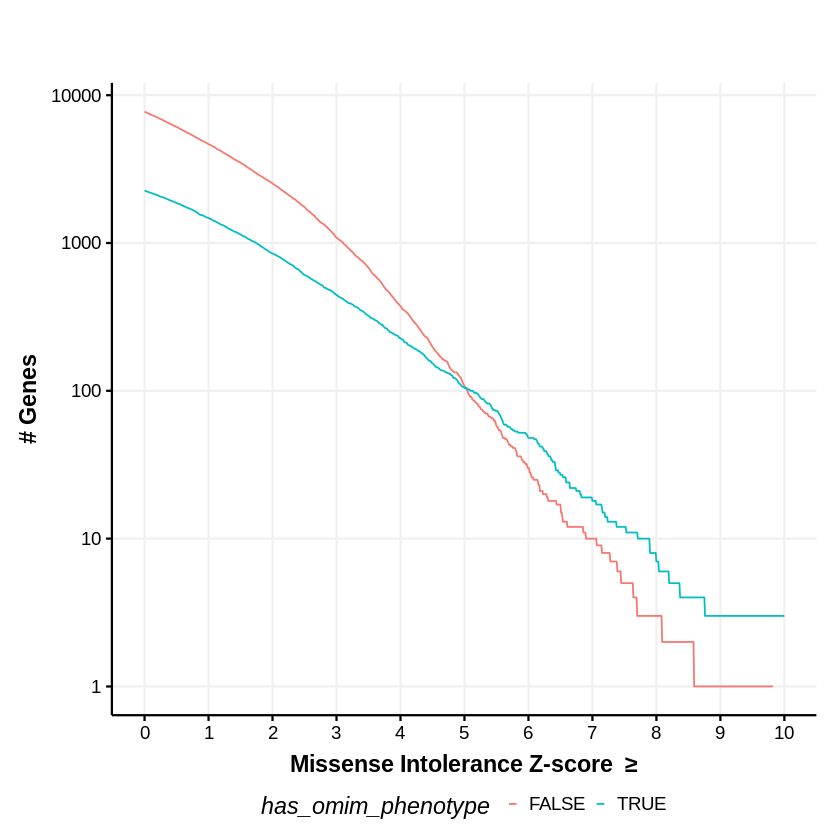

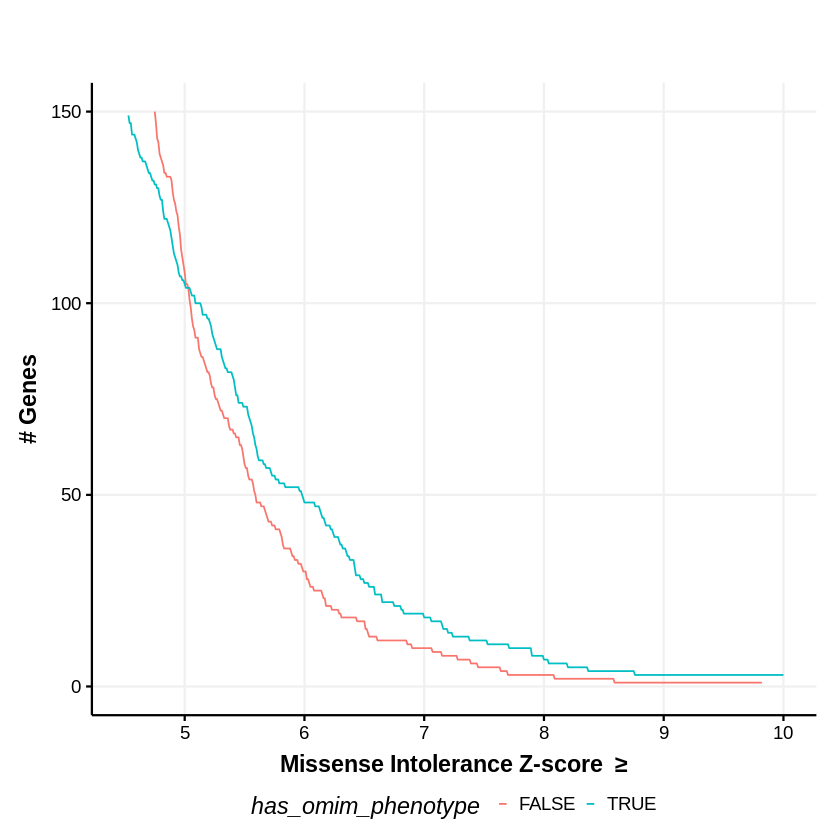

In [4]:
ggplot(mis_z_grouped, aes(x=greater_or_equal, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(y=n_2018, color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            scale_y_log10() +
            xlab(paste("Missense Intolerance Z-score", " ≥")) +
            scale_x_continuous(breaks=seq(0,10,1), limits=c(-0.01, 10)) +
            ggtitle("") +
            theme_Publication()
ggplot(mis_z_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            #scale_y_log10() +
            scale_y_continuous(limits=c(0,150)) +
            xlab(paste("Missense Intolerance Z-score", " ≥")) +
            scale_x_continuous(breaks=seq(0,10,1), limits=c(4.5, 10)) +
            ggtitle("") + 
            theme_Publication()

$density
[1] 0.65

$value
[1] 6.23

$candidate_list_size
[1] 20

$index
[1] 1247



[1] 0.668

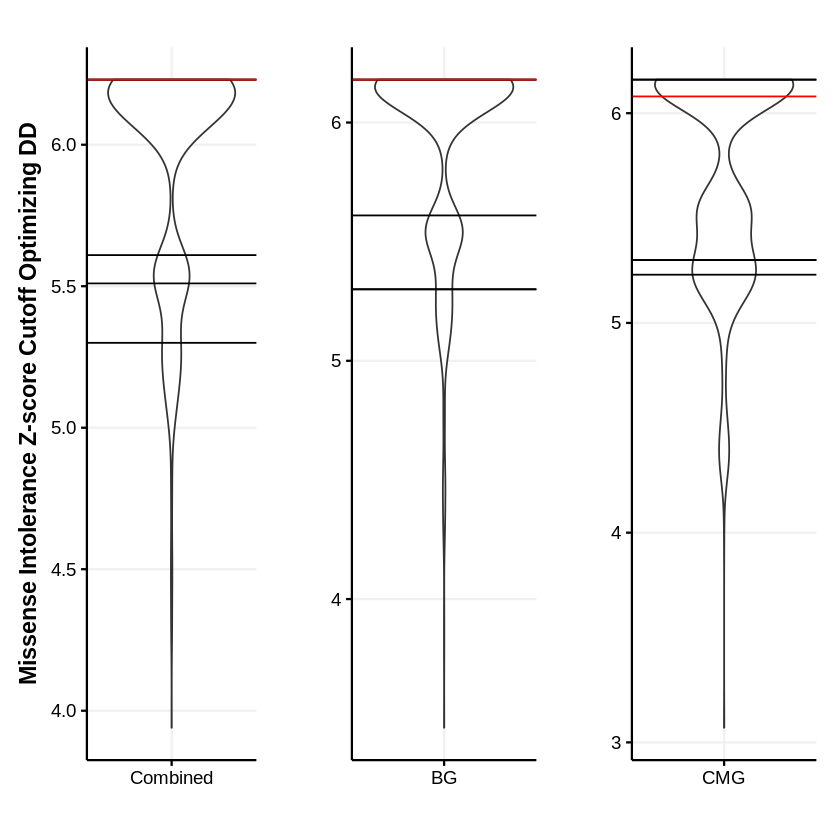

In [5]:
mis_z_cutoff = calculate_cutoff_filtered(mis_z_grouped)
print(mis_z_cutoff)
multiplot(get_cutoff_violin_plot(mis_z_grouped, N_SIMS, xlabel="Combined", ylabel="Missense Intolerance Z-score Cutoff Optimizing DD"), get_cutoff_violin_plot(mis_z_grouped_bgl, N_SIMS, xlabel="BG"), get_cutoff_violin_plot(mis_z_grouped_cmg, N_SIMS, xlabel="CMG"), cols=3)
# Calculate cutoff distribution
mis_z_ecdf = ecdf(get_sim_cutoffs(mis_z_grouped, N_SIMS))
mis_z_ecdf(mis_z_cutoff$value - 0.001)

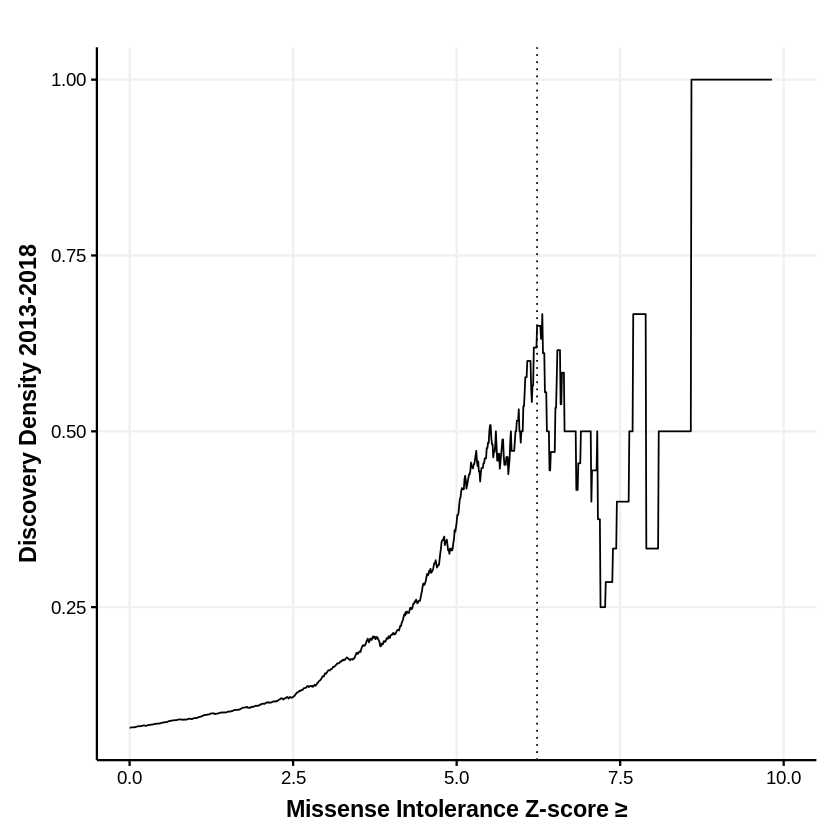

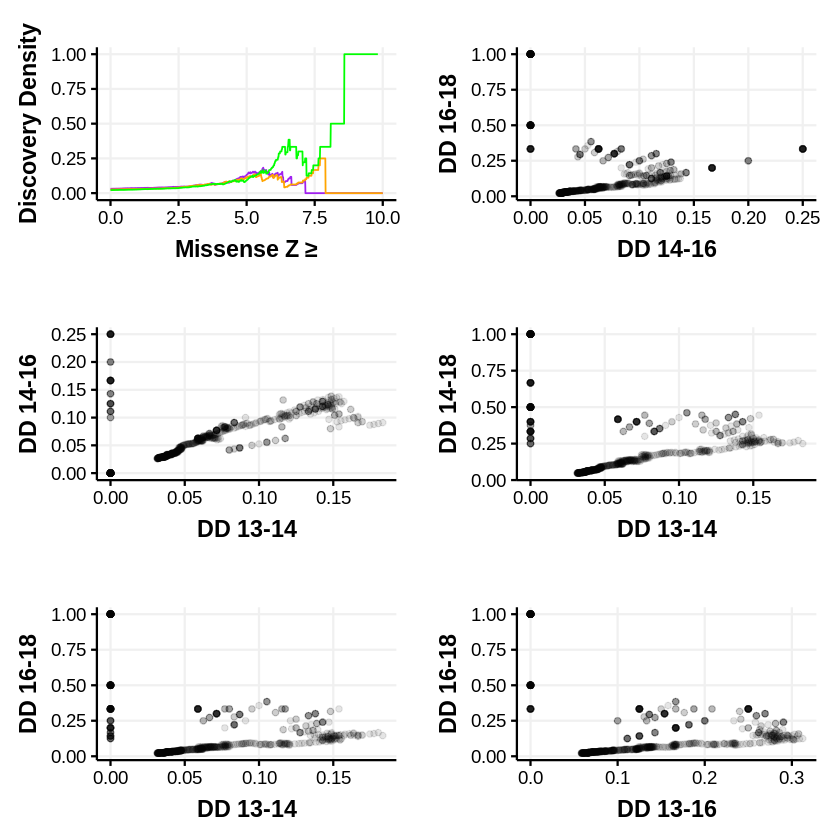

In [6]:
#mis_z_grouped_false = filter(mis_z_grouped, has_omim_phenotype==FALSE) %>% select(greater_or_equal, n_2018)
#colnames(mis_z_grouped_false)[2] = 'n_2018_false'
#mis_z_grouped_true = filter(mis_z_grouped, has_omim_phenotype==TRUE) %>% select(greater_or_equal, n_2018)
#colnames(mis_z_grouped_true)[2] = 'n_2018_true'
#mis_z_grouped_graphable = left_join(mis_z_grouped, mis_z_grouped_false, by='greater_or_equal') %>% left_join(mis_z_grouped_true, by='greater_or_equal')
ggplot(mis_z_grouped, aes(x=greater_or_equal, y=discovery_density_2013to2018)) + geom_line() + ylab("Discovery Density 2013-2018") + xlab("Missense Intolerance Z-score ≥") + geom_vline(xintercept=mis_z_cutoff$value, linetype='dotted') + theme_Publication()
## Compare 3 different types of plots for mis_z score
#ggplot(mis_z_grouped_graphable, aes(x=greater_or_equal)) + geom_line(aes(y=discovery_density_2016to2018), color="blue") + geom_line(aes(y=((n_2018_true/n_2018_false)/total_genelist_size)), color="red") + geom_line(aes(y=discovery_density_2016to2018 - ((n_2018_true/n_2018_false)/total_genelist_size)), color="green") + ylab("depends on color, blue=discov_density, red=T/F") + xlab("Missense intolerance z-score >=")

plot_dd_year_combinations(mis_z_grouped, "Missense Z ≥")

Joining, by = "greater_or_equal"
Joining, by = "greater_or_equal"


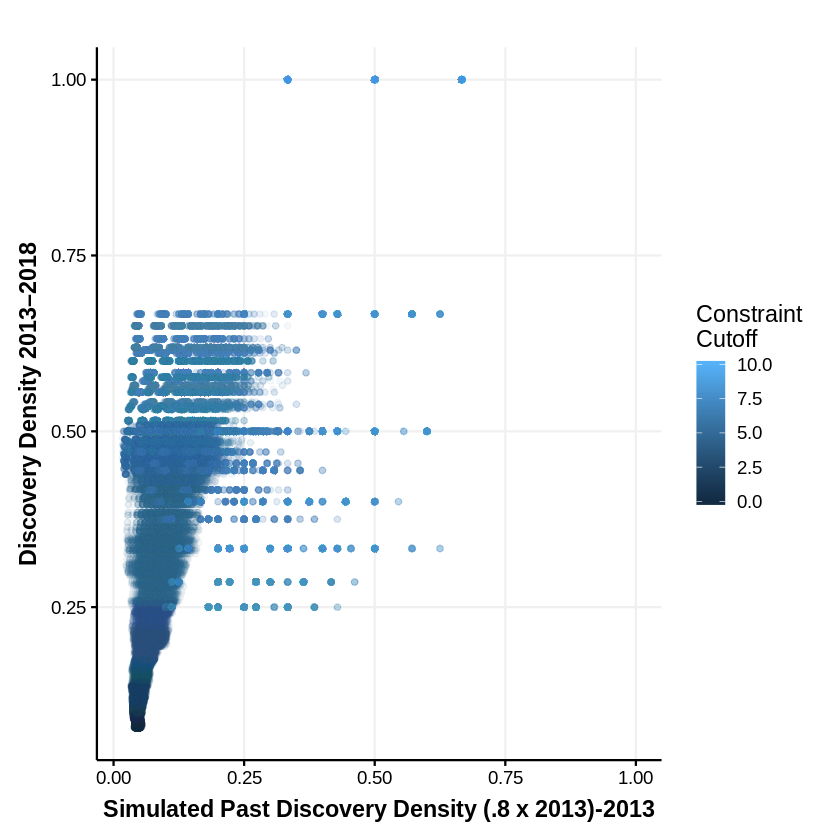

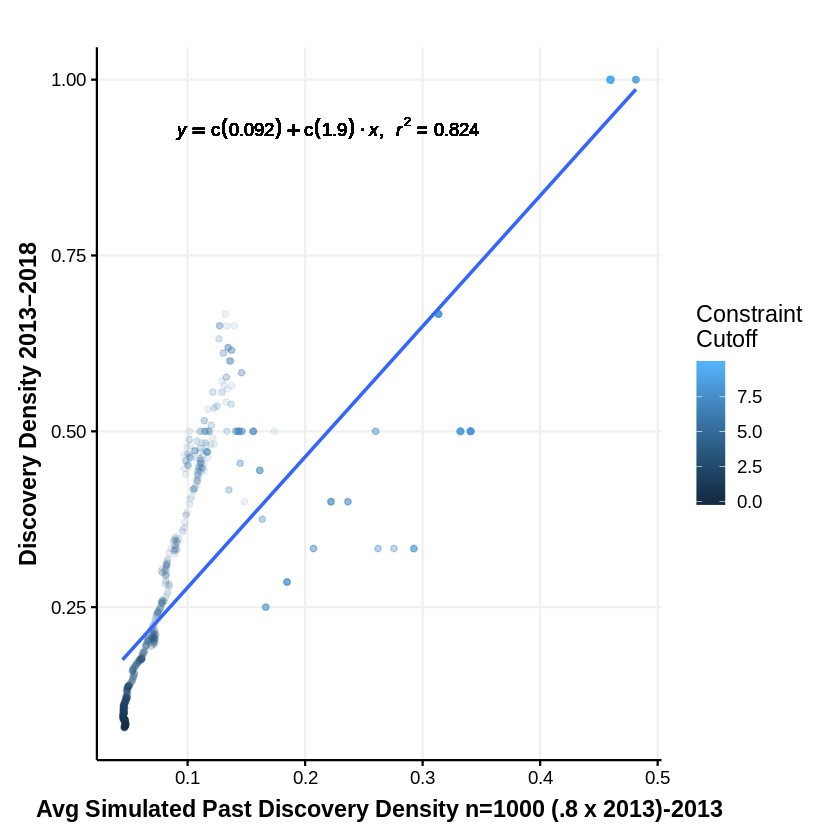

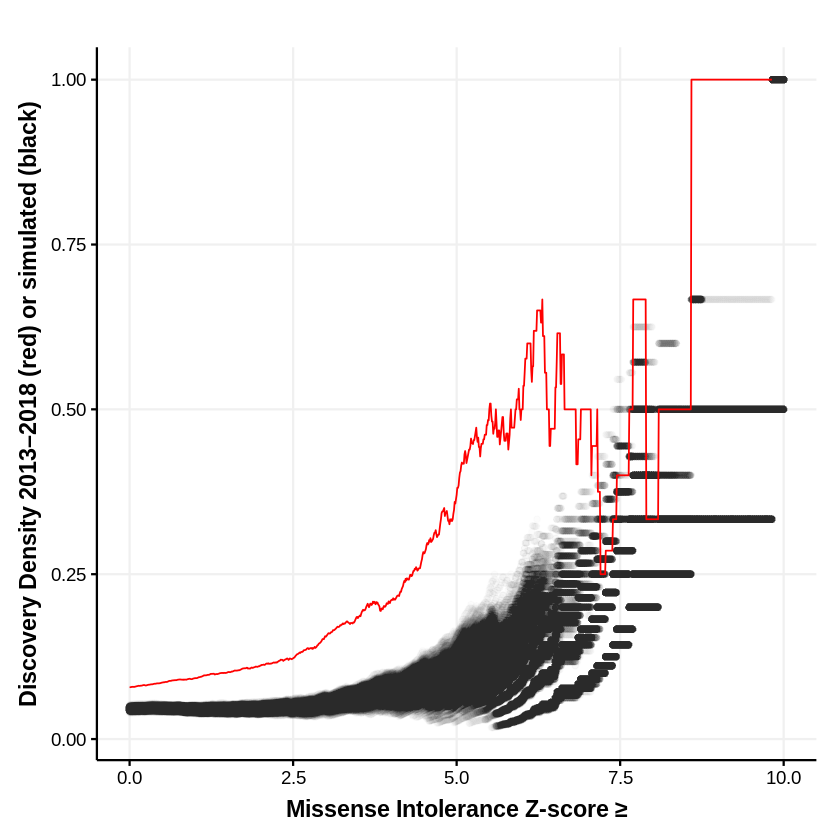

In [7]:
plot_simulated_discovery(mis_z_grouped, N_SIMS, "Missense Intolerance Z-score ≥")

## LOF_Z

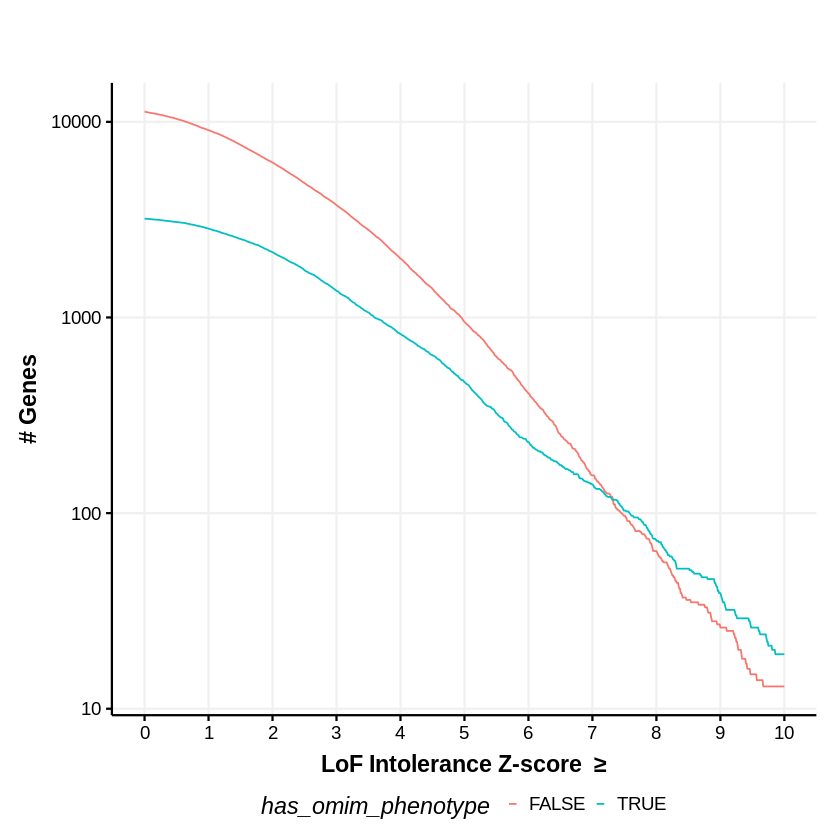

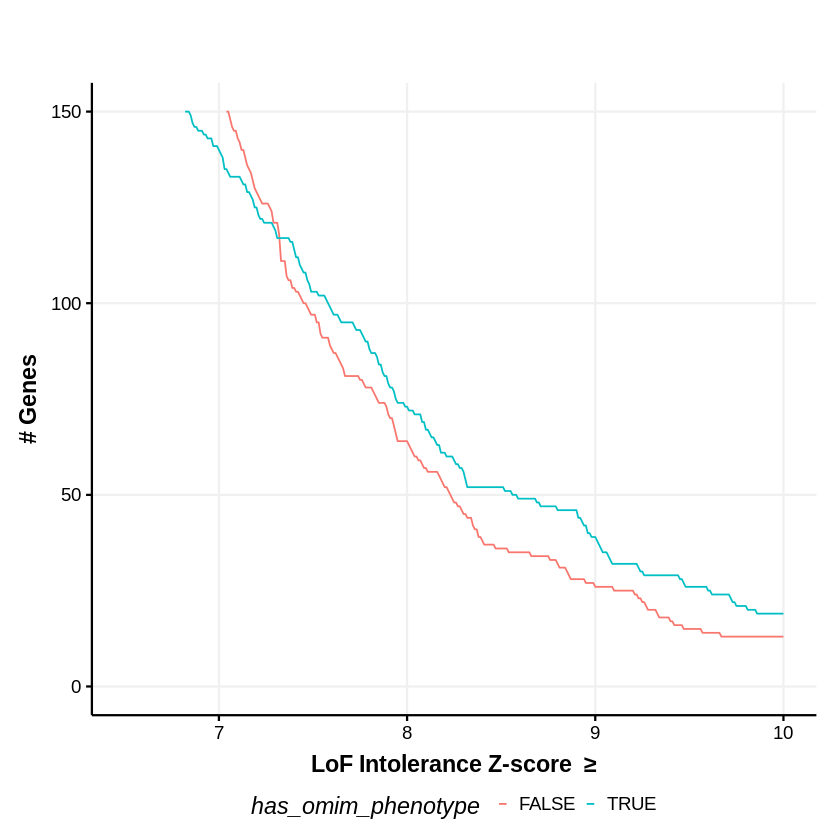

In [8]:
ggplot(lof_z_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            scale_y_log10() +
            xlab(paste("LoF Intolerance Z-score", " ≥")) +
            scale_x_continuous(breaks=seq(0,10,1), limits=c(-0.01, 10)) +
            ggtitle("") + 
            theme_Publication()
ggplot(lof_z_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            #scale_y_log10() +
            scale_y_continuous(limits=c(0,150)) +
            xlab(paste("LoF Intolerance Z-score", " ≥")) +
            scale_x_continuous(breaks=seq(0,10,1), limits=c(6.5, 10)) +
            ggtitle("") +
            theme_Publication()

$density
[1] 0.55

$value
[1] 9.28

$candidate_list_size
[1] 20

$index
[1] 1857



[1] 0.652

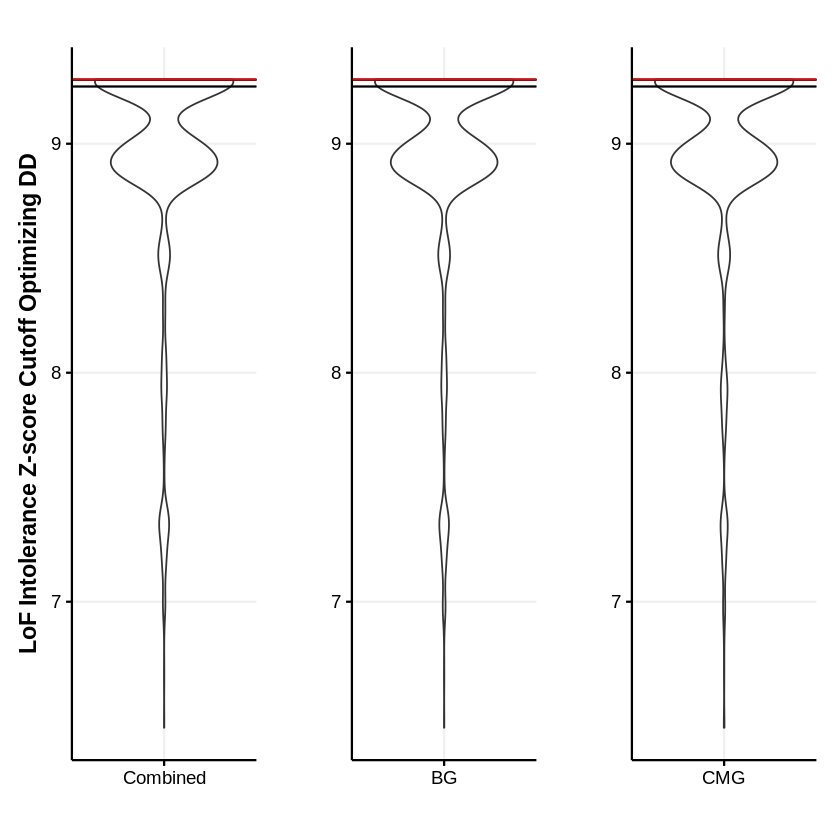

In [9]:
lof_z_cutoff = calculate_cutoff_filtered(lof_z_grouped)
print(lof_z_cutoff)
multiplot(get_cutoff_violin_plot(lof_z_grouped, N_SIMS, xlabel="Combined", ylabel="LoF Intolerance Z-score Cutoff Optimizing DD"), get_cutoff_violin_plot(lof_z_grouped_bgl, N_SIMS, xlabel="BG"), get_cutoff_violin_plot(lof_z_grouped_cmg, N_SIMS, xlabel="CMG"), cols=3)
# Calculate cutoff distribution
lof_z_ecdf = ecdf(get_sim_cutoffs(lof_z_grouped, N_SIMS))
lof_z_ecdf(lof_z_cutoff$value - 0.001)

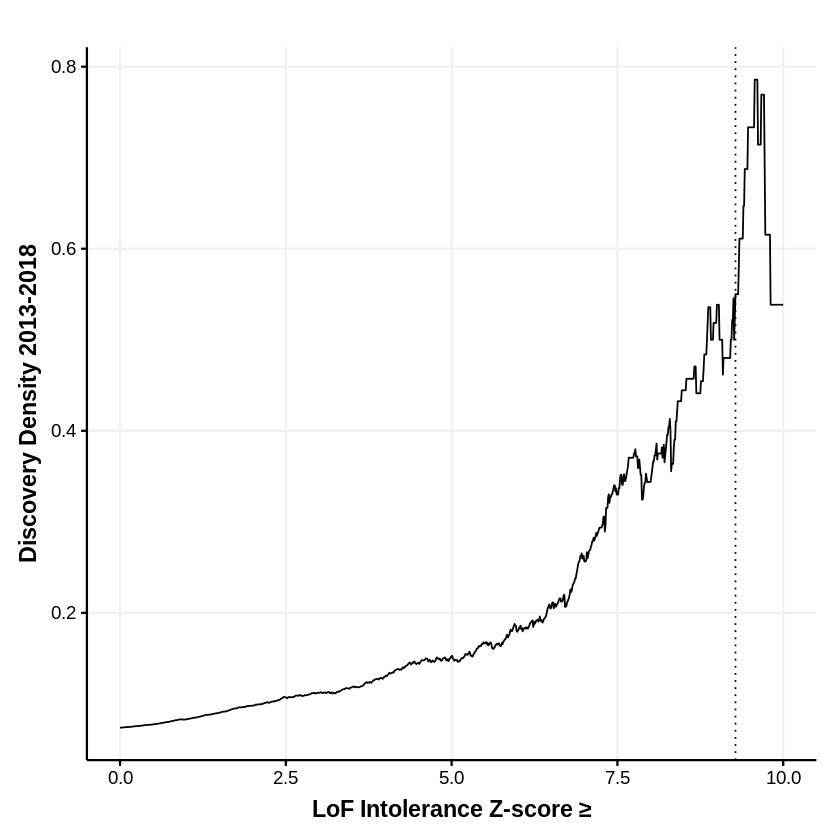

NULL

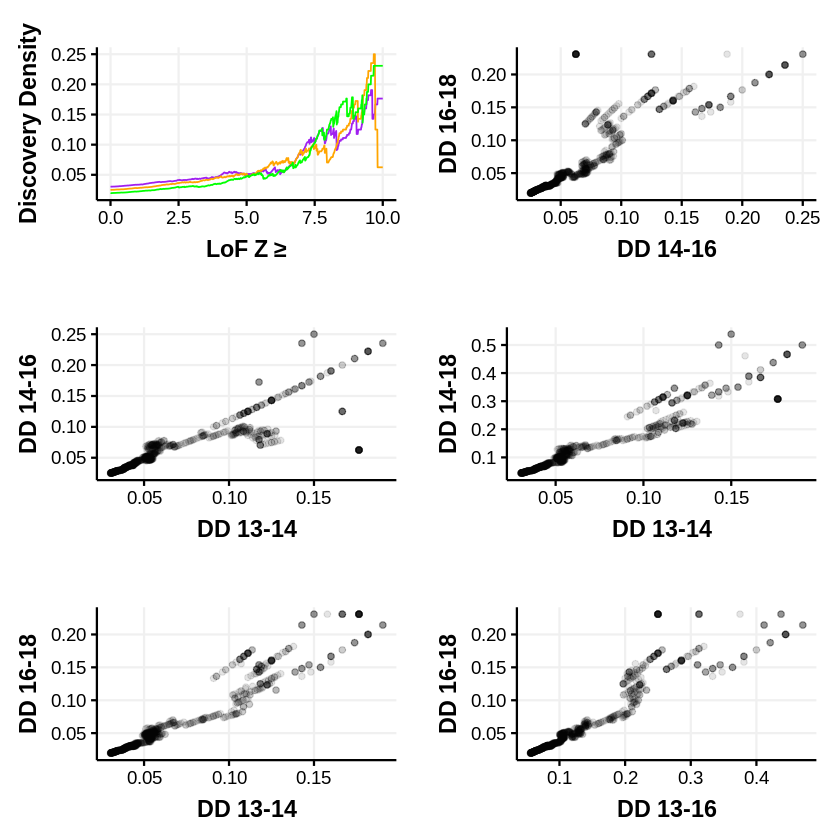

In [10]:
ggplot(lof_z_grouped, aes(x=greater_or_equal, y=discovery_density_2013to2018)) + geom_line() + ylab("Discovery Density 2013-2018") + xlab("LoF Intolerance Z-score ≥") + geom_vline(xintercept=lof_z_cutoff$value, linetype='dotted') + theme_Publication()

plot_dd_year_combinations(lof_z_grouped, "LoF Z ≥") + theme_Publication()

Joining, by = "greater_or_equal"
Joining, by = "greater_or_equal"


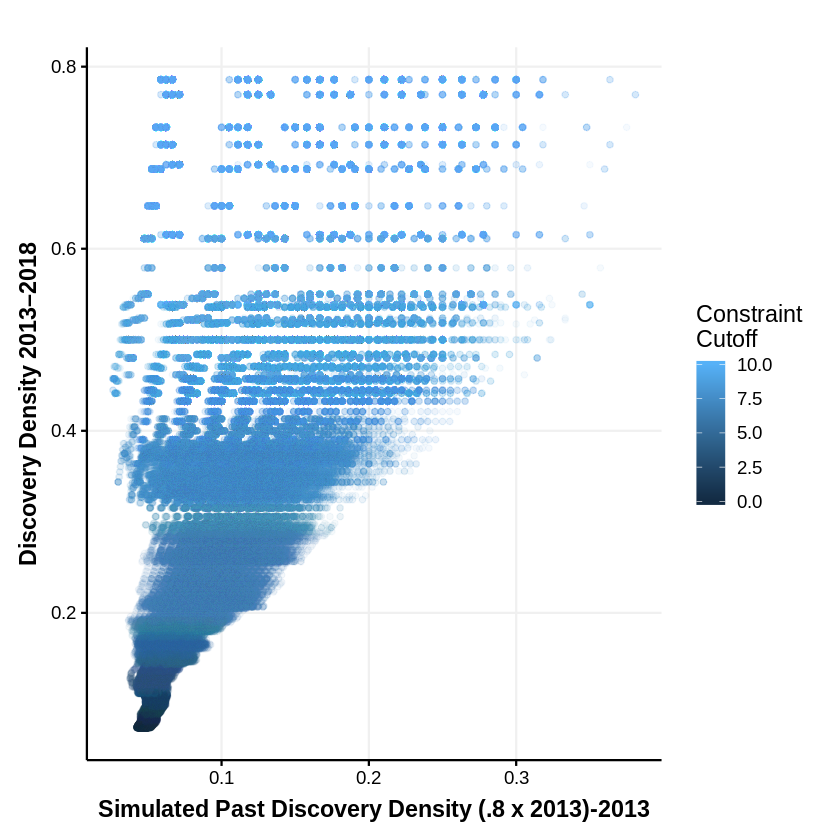

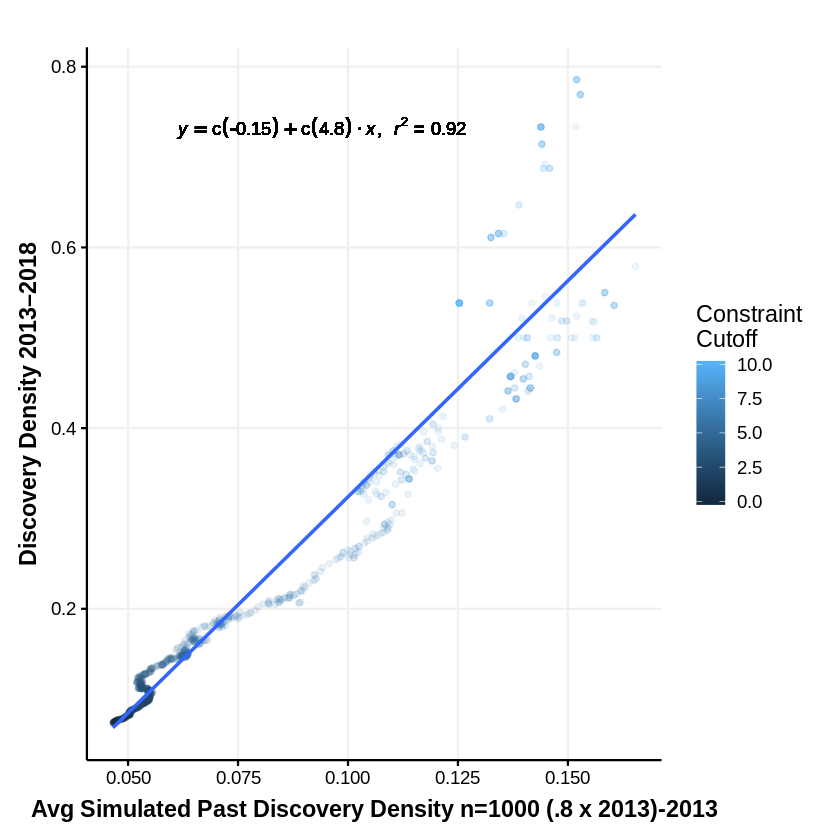

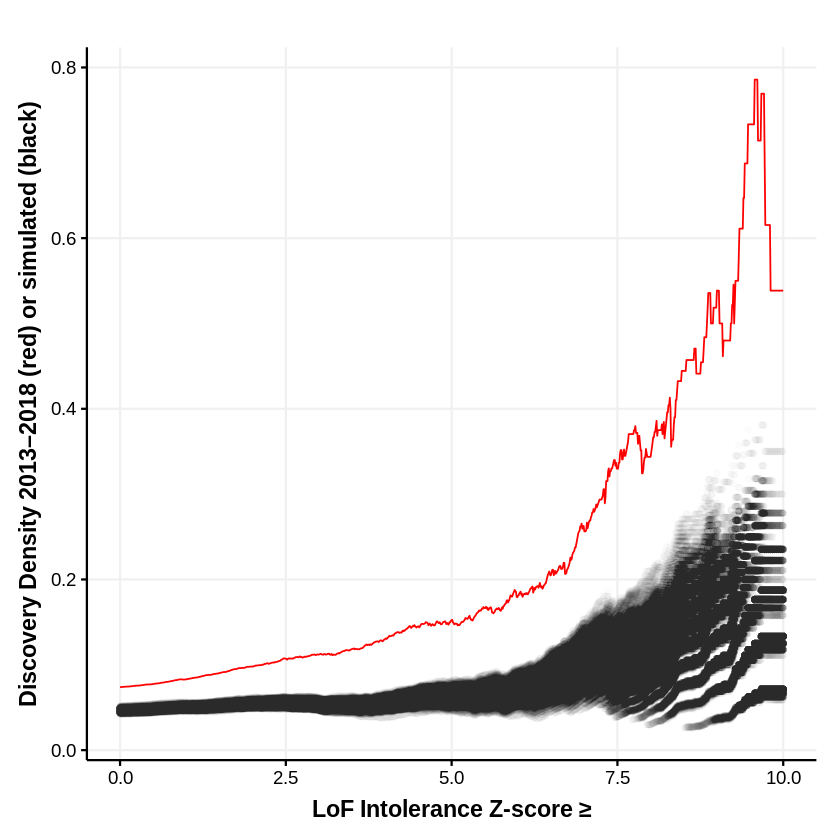

In [11]:
plot_simulated_discovery(lof_z_grouped, N_SIMS, score_plot_title="LoF Intolerance Z-score ≥")

## MTR

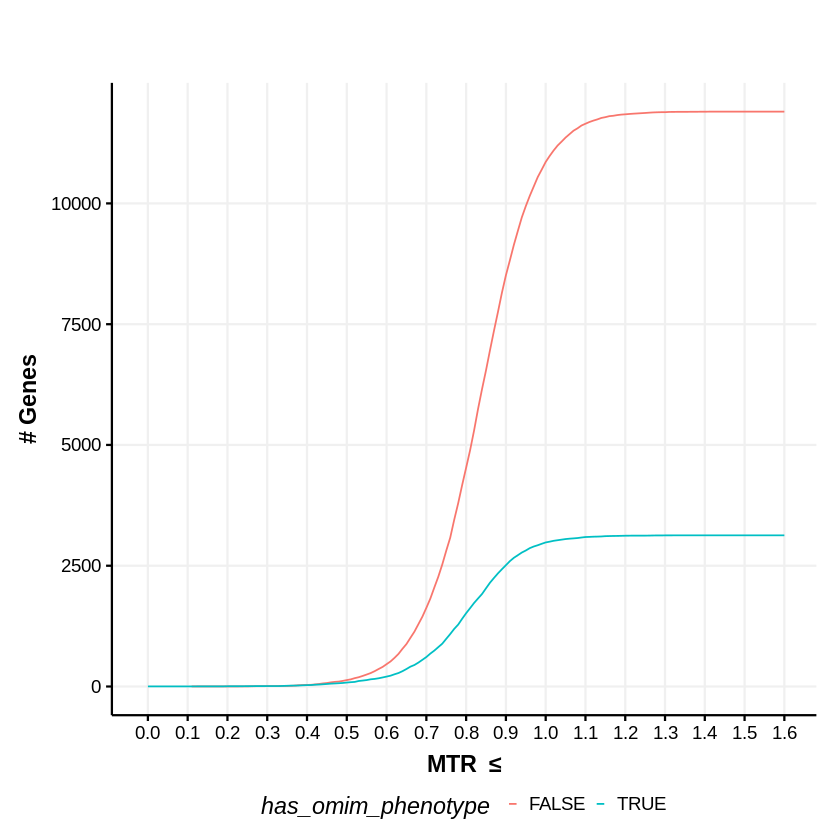

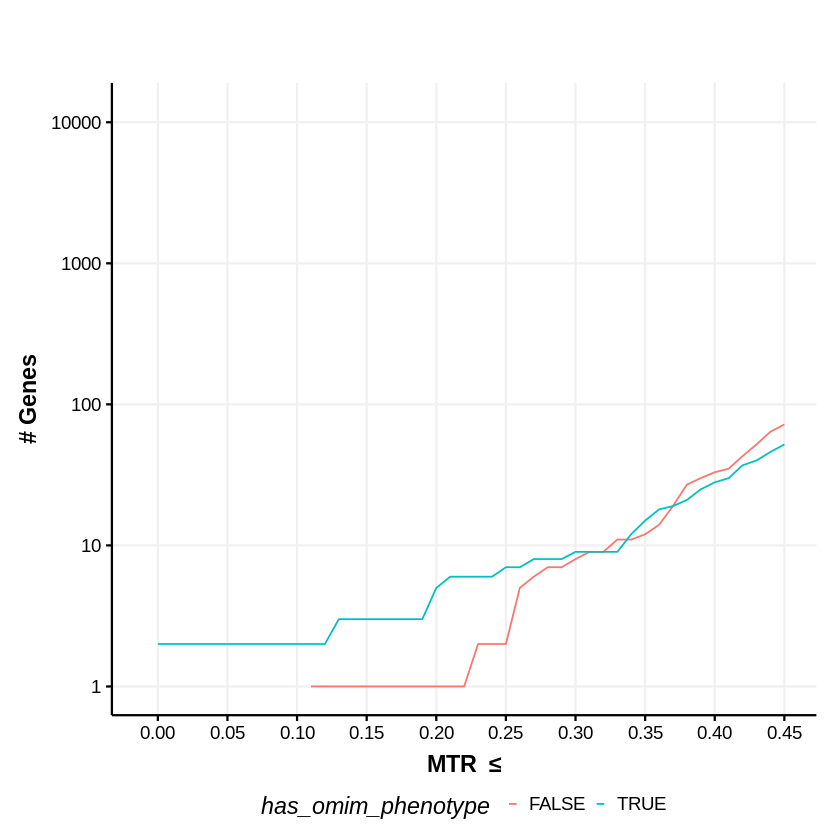

In [12]:
ggplot(mtr_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            #scale_y_log10() +
            xlab(paste("MTR", " ≤")) +
            scale_x_continuous(breaks=seq(0,1.6,0.1), limits=c(-0.01, 1.6)) +
            ggtitle("") +
            theme_Publication()
ggplot(mtr_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            scale_y_log10() +
            xlab(paste("MTR", " ≤")) +
            scale_x_continuous(breaks=seq(0,.45,0.05), limits=c(-0.01, 0.45)) +
            ggtitle("") +
            theme_Publication()

$density
[1] 0.372093

$value
[1] 0.42

$candidate_list_size
[1] 43

$index
[1] 85



[1] 0.75

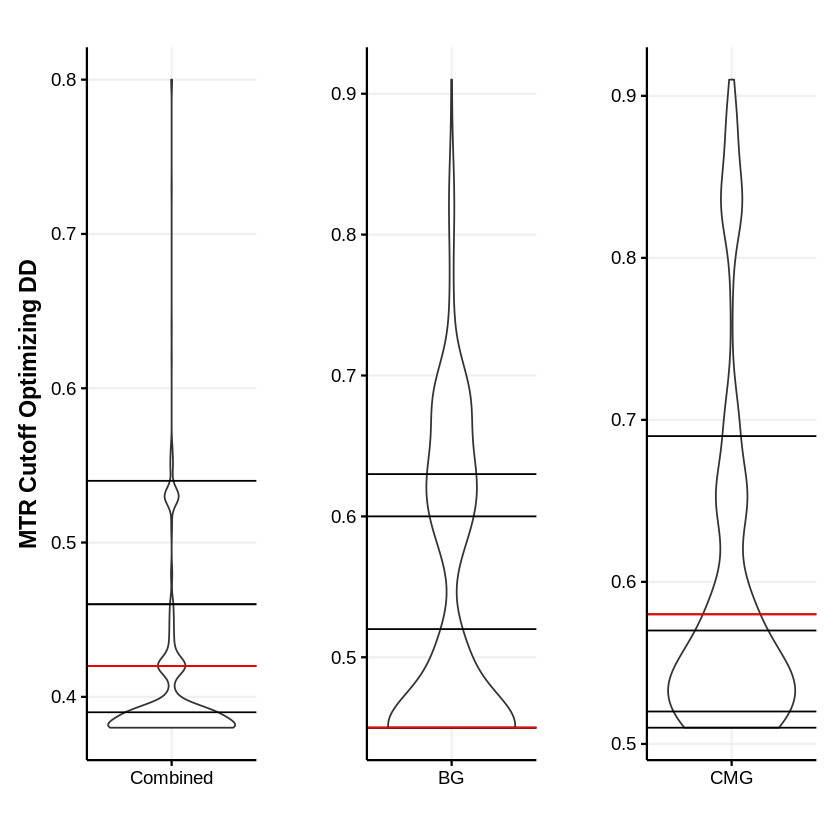

In [13]:
mtr_cutoff = calculate_cutoff_filtered(mtr_grouped)
print(mtr_cutoff)
multiplot(get_cutoff_violin_plot(mtr_grouped, N_SIMS, xlabel="Combined", ylabel="MTR Cutoff Optimizing DD"), get_cutoff_violin_plot(mtr_grouped_bgl, N_SIMS, xlabel="BG"), get_cutoff_violin_plot(mtr_grouped_cmg, N_SIMS, xlabel="CMG"), cols=3)
# Calculate cutoff distribution
mtr_ecdf = ecdf(get_sim_cutoffs(mtr_grouped, N_SIMS))
mtr_ecdf(mtr_cutoff$value - 0.001)

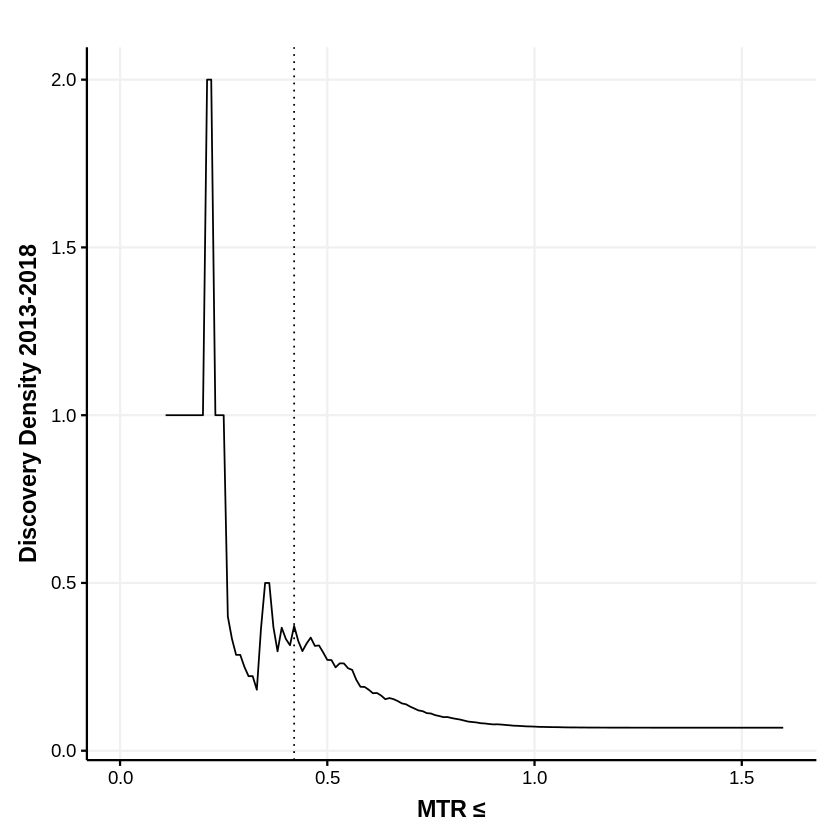

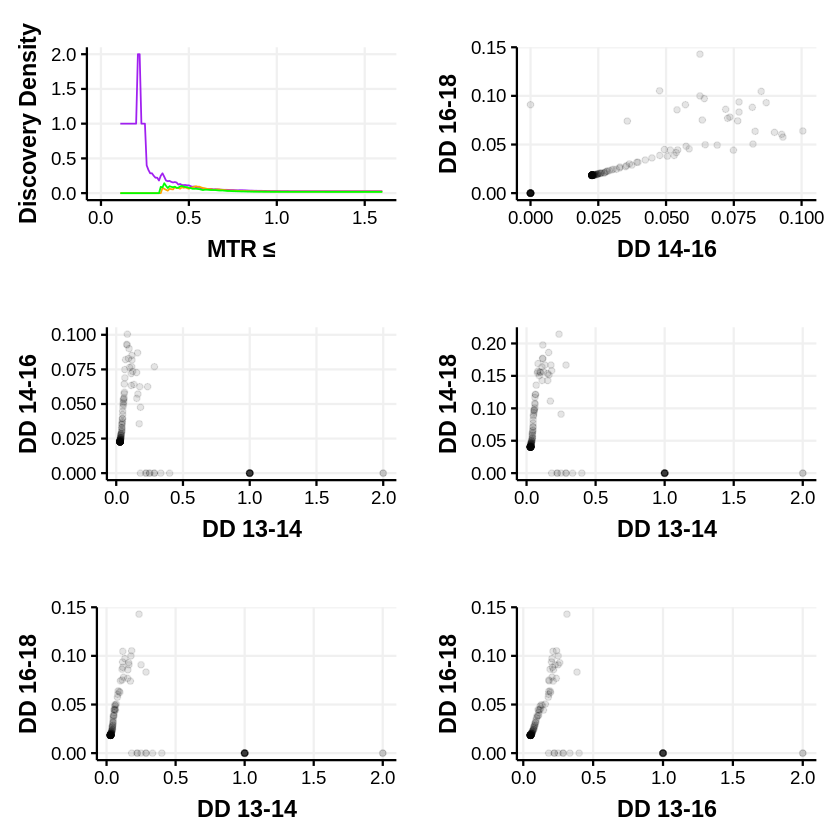

In [14]:
ggplot(mtr_grouped, aes(x=greater_or_equal, y=discovery_density_2013to2018)) + geom_line() + ylab("Discovery Density 2013-2018") + xlab("MTR ≤") + geom_vline(xintercept=mtr_cutoff$value, linetype='dotted') + theme_Publication()

plot_dd_year_combinations(mtr_grouped, "MTR ≤")

Joining, by = "greater_or_equal"
Joining, by = "greater_or_equal"


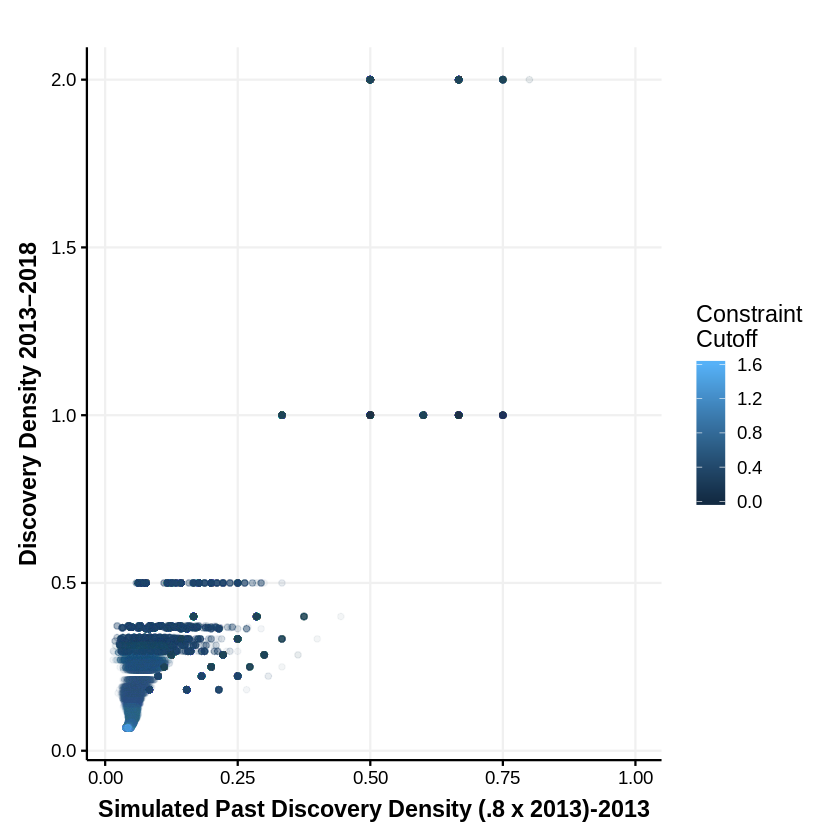

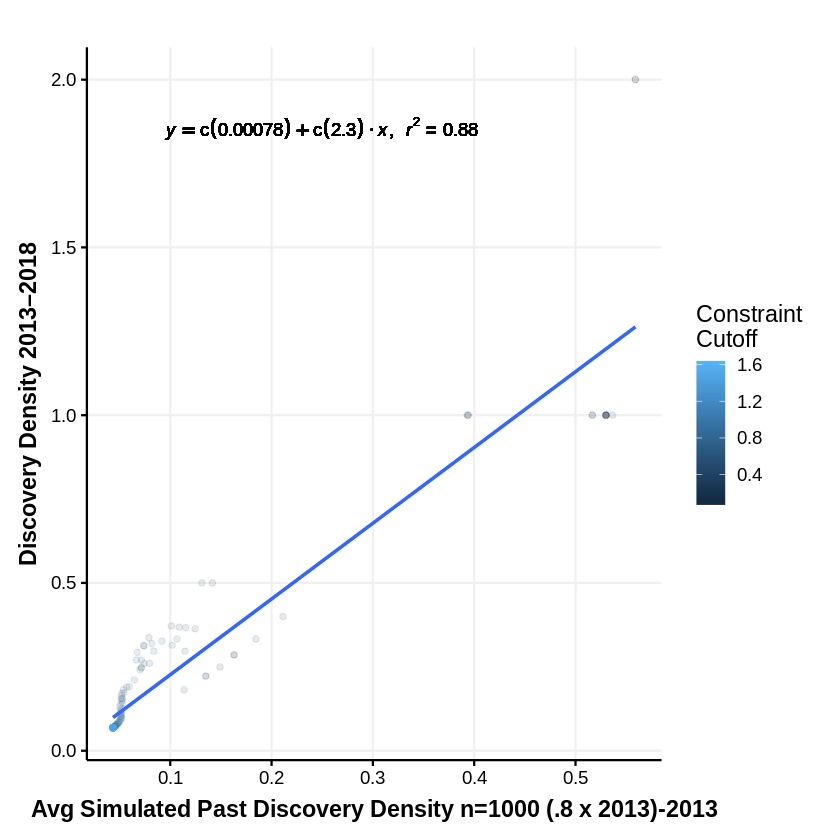

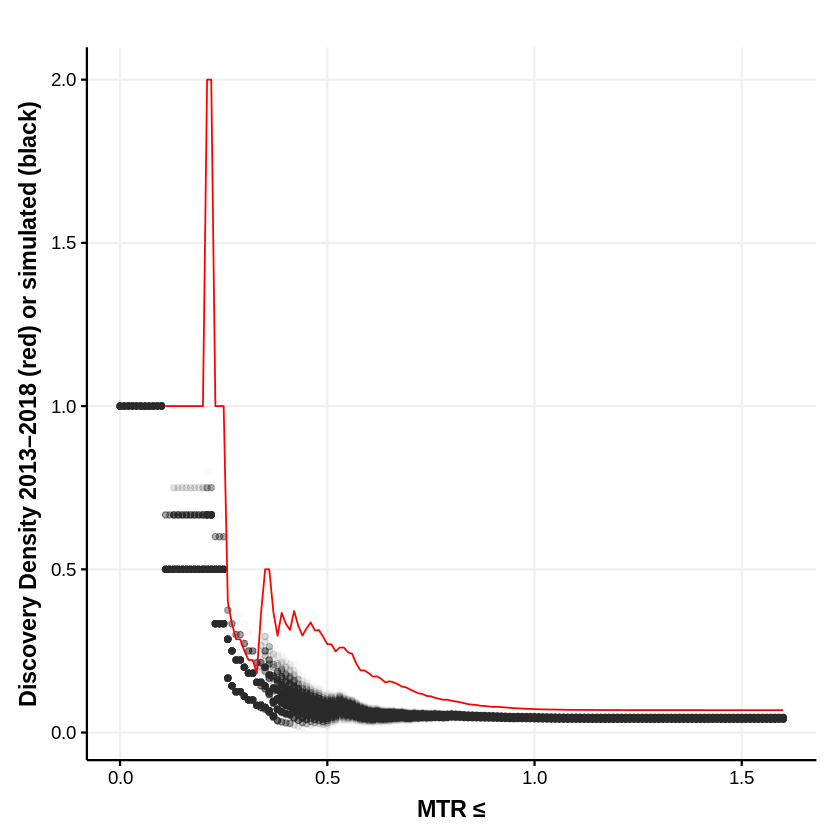

In [15]:
plot_simulated_discovery(mtr_grouped, N_SIMS, score_plot_title="MTR ≤")

## REVEL

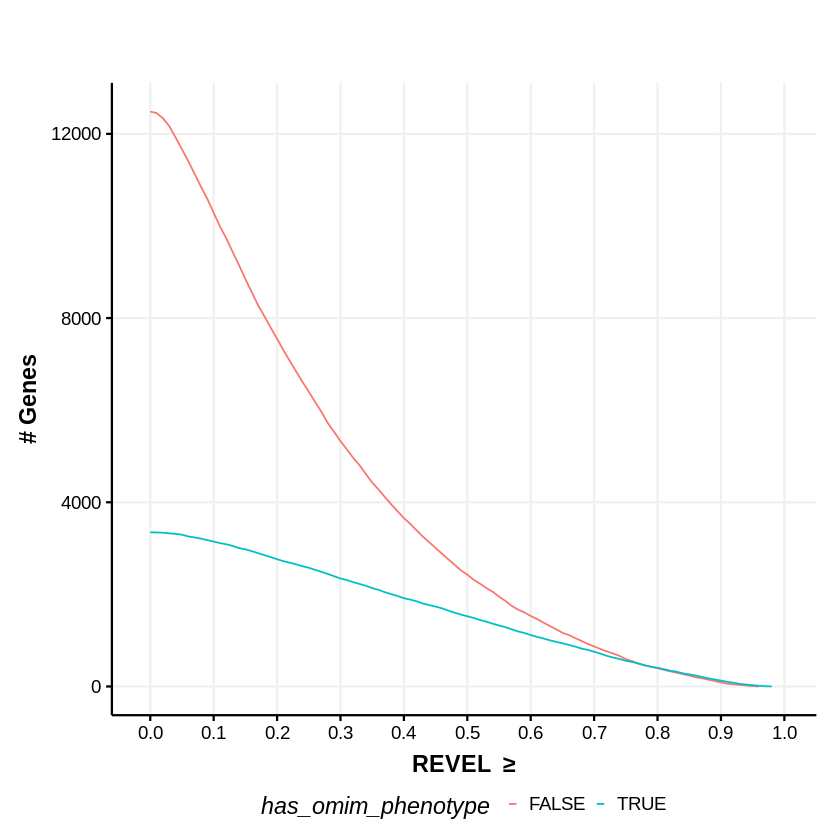

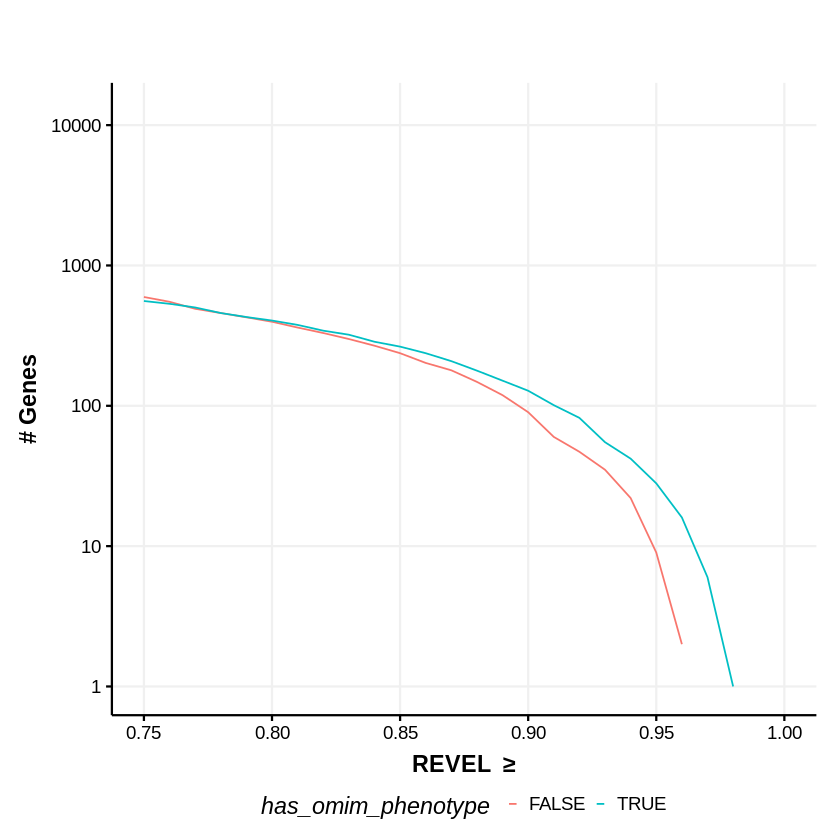

In [16]:
ggplot(revel_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            #scale_y_log10() +
            xlab(paste("REVEL", " ≥")) +
            scale_x_continuous(breaks=seq(0,1,0.1), limits=c(-0.01, 1)) +
            ggtitle("") +
            theme_Publication()
ggplot(revel_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            scale_y_log10() +
            xlab(paste("REVEL", " ≥")) +
            scale_x_continuous(breaks=seq(0.75,1,0.05), limits=c(.75, 1)) +
            ggtitle("") +
            theme_Publication()

$density
[1] 0.2

$value
[1] 0.91

$candidate_list_size
[1] 60

$index
[1] 183



[1] 0.133

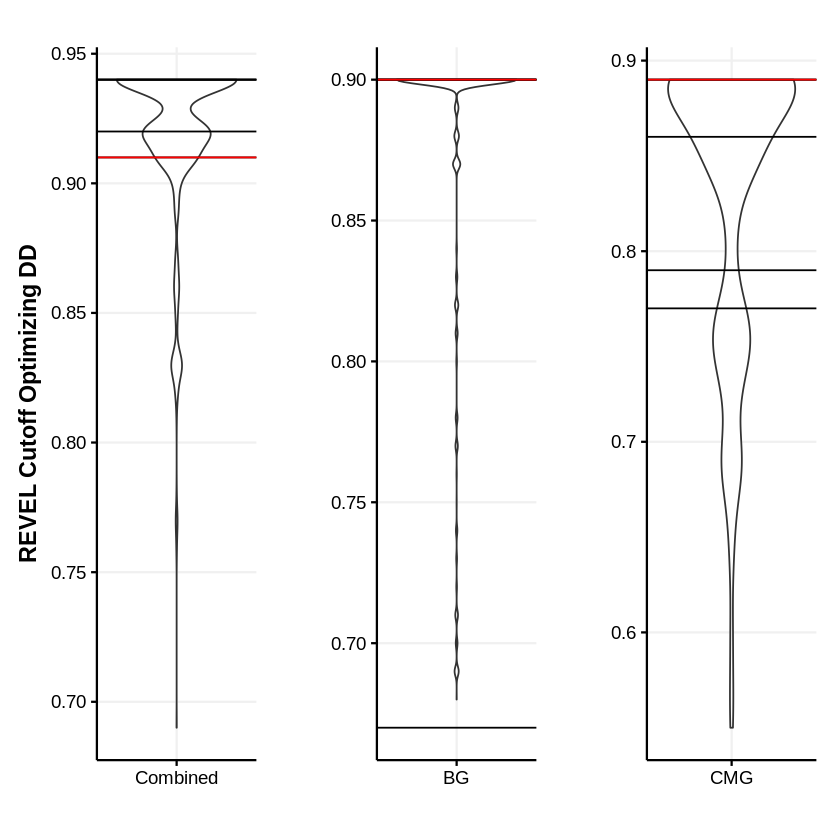

In [17]:
revel_cutoff = calculate_cutoff_filtered(revel_grouped)
print(revel_cutoff)
multiplot(get_cutoff_violin_plot(revel_grouped, N_SIMS, xlabel="Combined", ylabel="REVEL Cutoff Optimizing DD"), get_cutoff_violin_plot(revel_grouped_bgl, N_SIMS, xlabel="BG"), get_cutoff_violin_plot(revel_grouped_cmg, N_SIMS, xlabel="CMG"), cols=3)
# Calculate cutoff distribution
revel_ecdf = ecdf(get_sim_cutoffs(revel_grouped, N_SIMS))
revel_ecdf(revel_cutoff$value - 0.001)

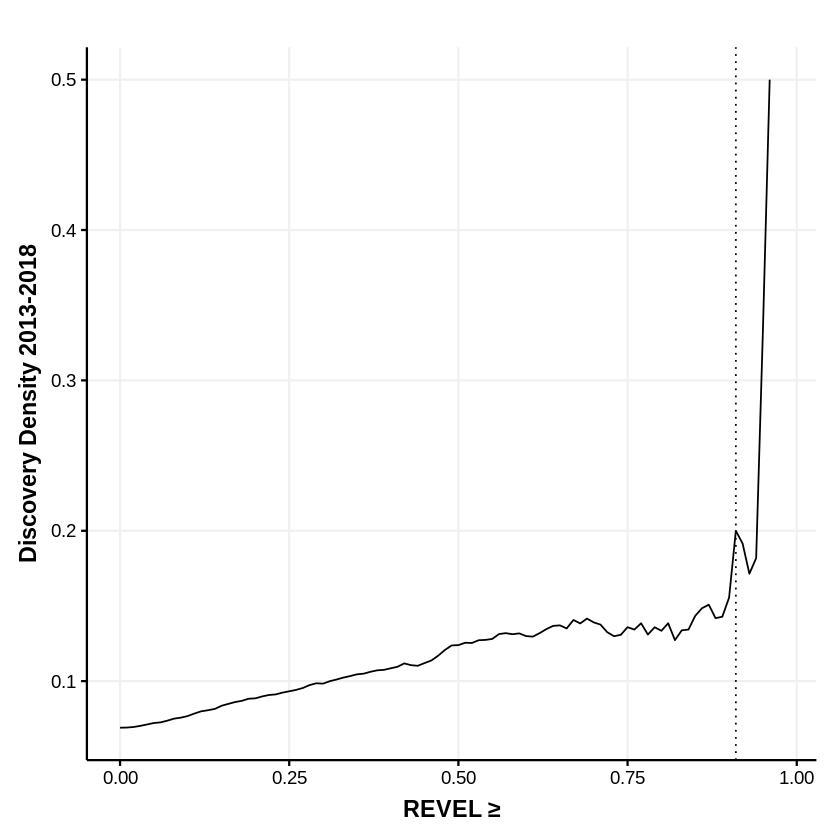

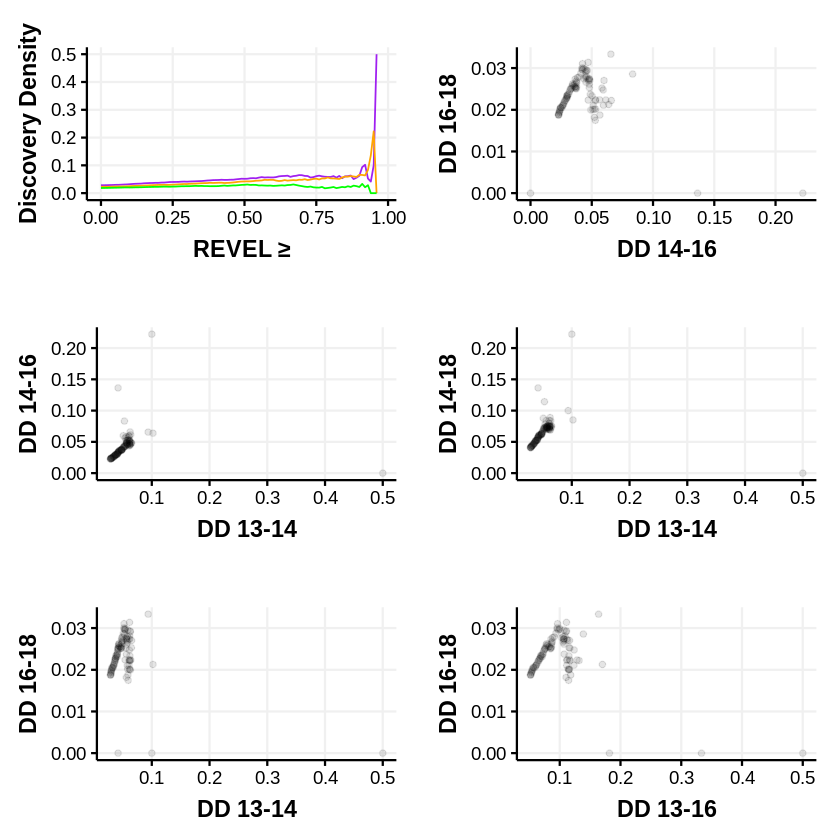

In [18]:
ggplot(revel_grouped, aes(x=greater_or_equal)) + geom_line(aes(y=discovery_density_2013to2018)) + ylab("Discovery Density 2013-2018") + xlab("REVEL ≥") + geom_vline(xintercept=revel_cutoff$value, linetype='dotted') + theme_Publication()

plot_dd_year_combinations(revel_grouped, "REVEL ≥")

Joining, by = "greater_or_equal"
Joining, by = "greater_or_equal"


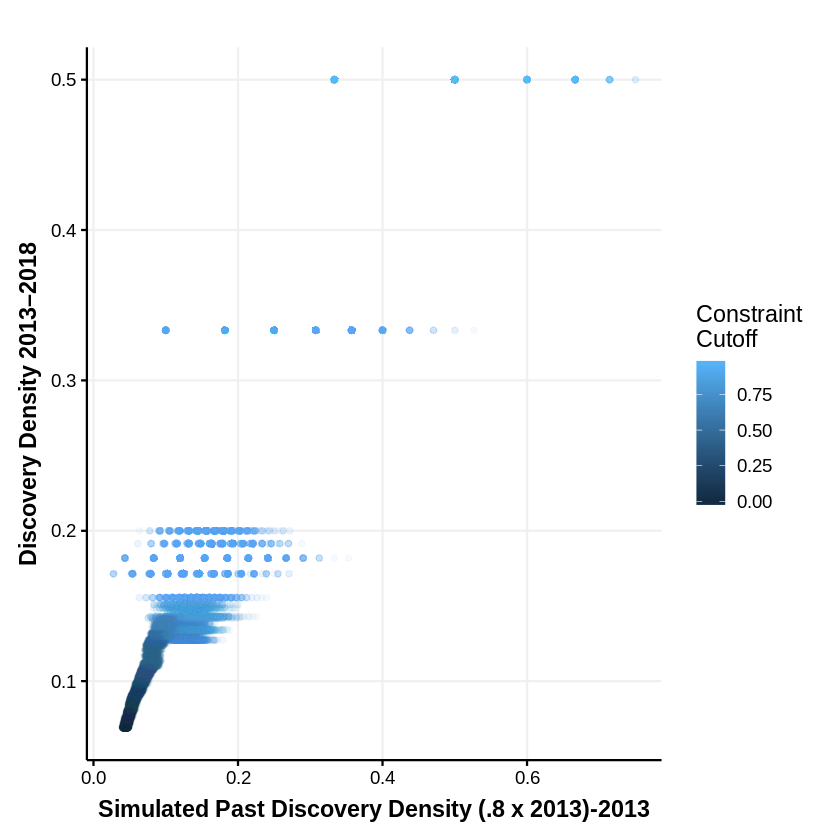

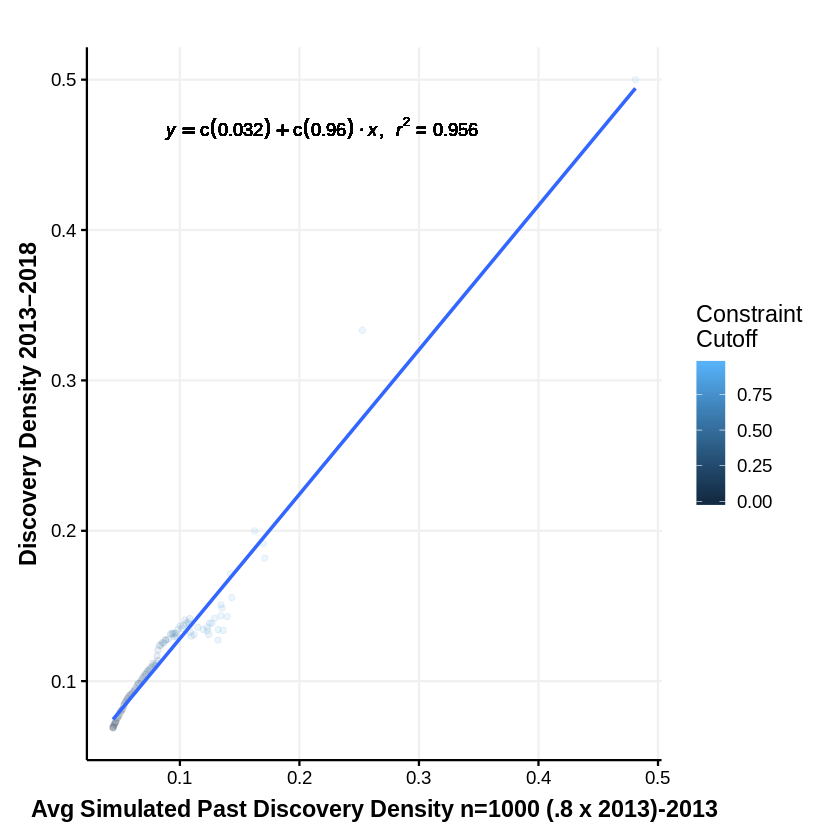

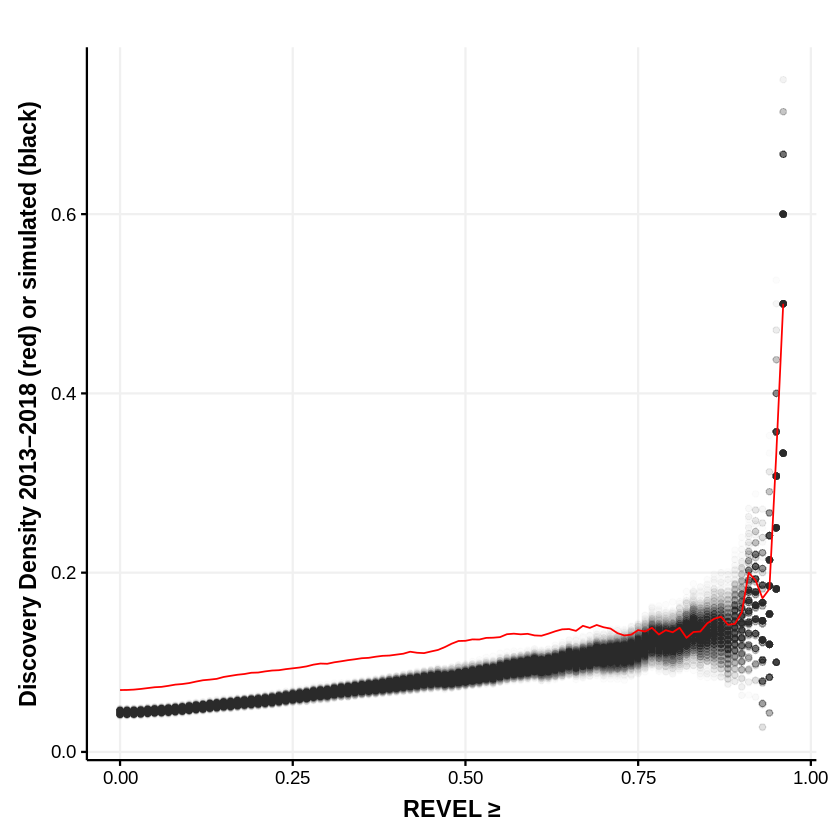

In [19]:
plot_simulated_discovery(revel_grouped, N_SIMS, score_plot_title="REVEL ≥")

## PolyPhen

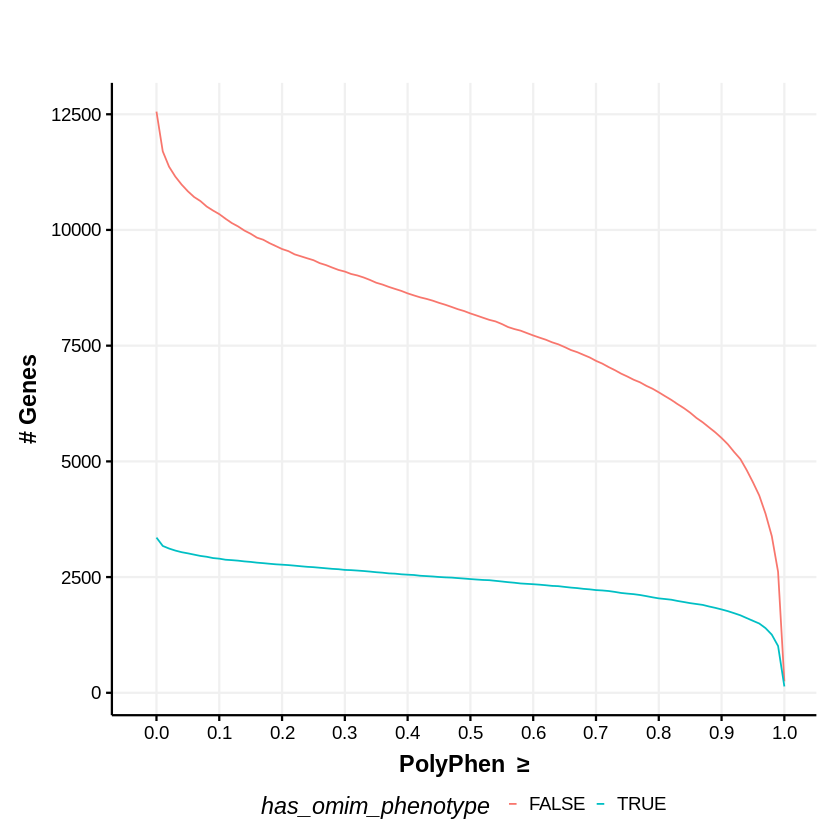

In [20]:
ggplot(polyphen_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            #scale_y_log10() +
            xlab(paste("PolyPhen", " ≥")) +
            scale_x_continuous(breaks=seq(0,1,0.1), limits=c(-0.02, 1)) +
            ggtitle("") +
            theme_Publication()

$density
[1] 0.1093117

$value
[1] 1

$candidate_list_size
[1] 247

$index
[1] 201

[1] 0.046

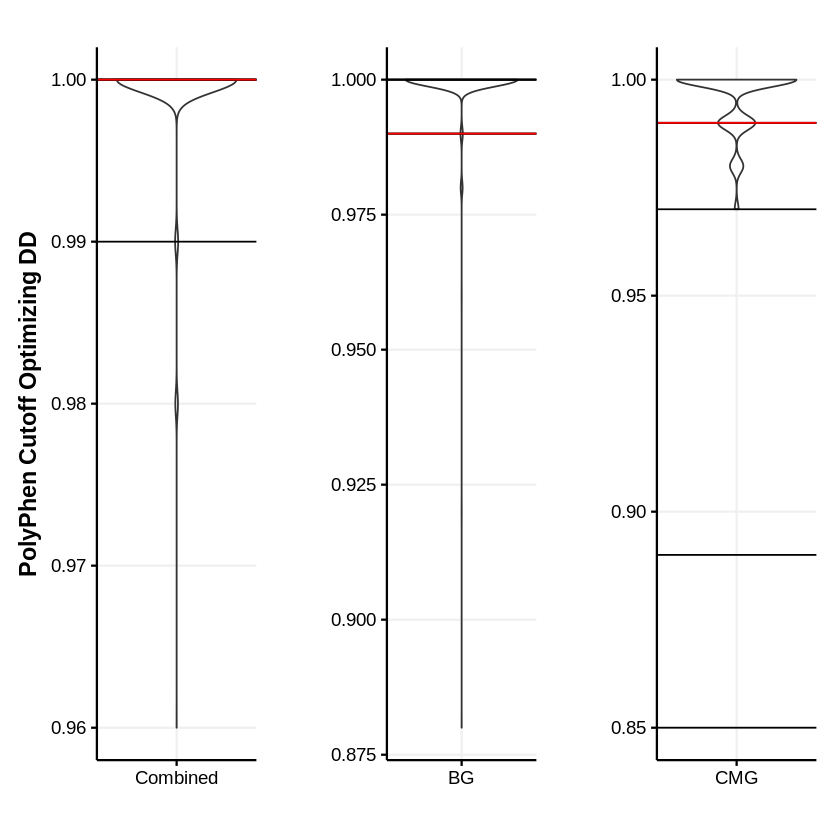

In [21]:
polyphen_cutoff = calculate_cutoff_filtered(polyphen_grouped)
polyphen_cutoff
multiplot(get_cutoff_violin_plot(polyphen_grouped, N_SIMS, xlabel="Combined", ylabel="PolyPhen Cutoff Optimizing DD"), get_cutoff_violin_plot(polyphen_grouped_bgl, N_SIMS, xlabel="BG"), get_cutoff_violin_plot(polyphen_grouped_cmg, N_SIMS, xlabel="CMG"), cols=3)
# Calculate cutoff distribution
polyphen_ecdf = ecdf(get_sim_cutoffs(polyphen_grouped, N_SIMS))
polyphen_ecdf(polyphen_cutoff$value - 0.001)

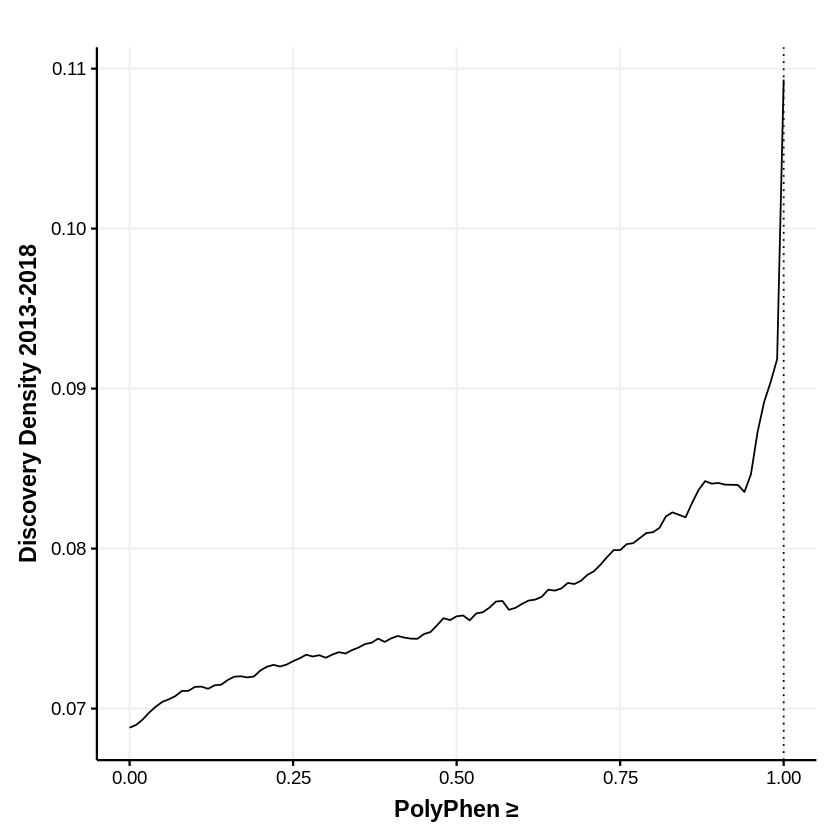

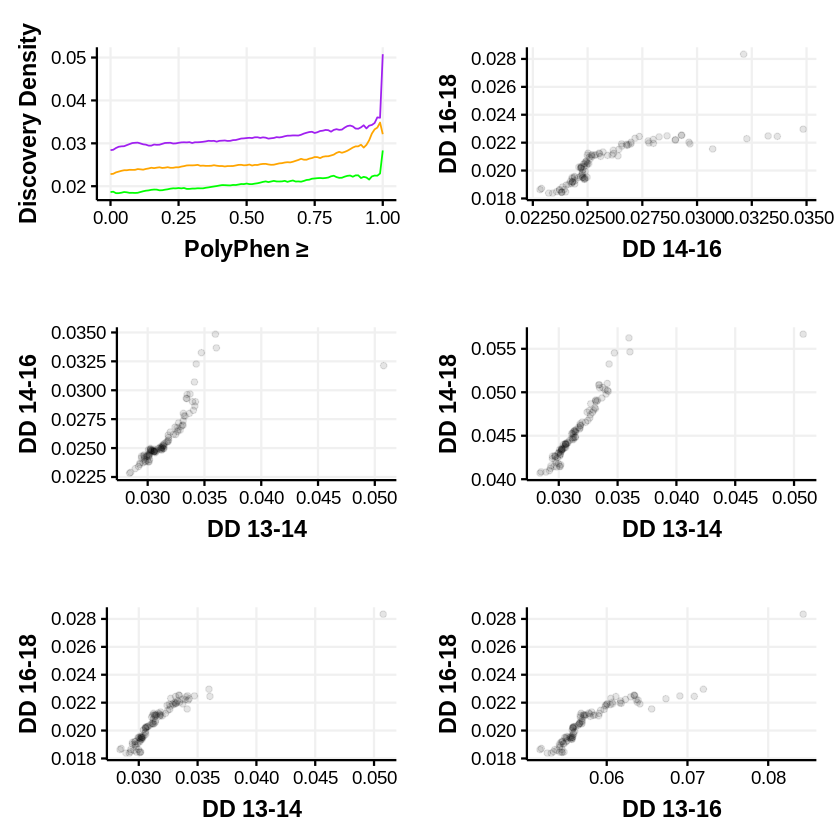

In [22]:
ggplot(polyphen_grouped, aes(x=greater_or_equal, y=discovery_density_2013to2018)) + geom_line() + ylab("Discovery Density 2013-2018") + xlab("PolyPhen ≥") + geom_vline(xintercept=polyphen_cutoff$value, linetype='dotted') + theme_Publication()

plot_dd_year_combinations(polyphen_grouped, "PolyPhen ≥")

Joining, by = "greater_or_equal"
Joining, by = "greater_or_equal"


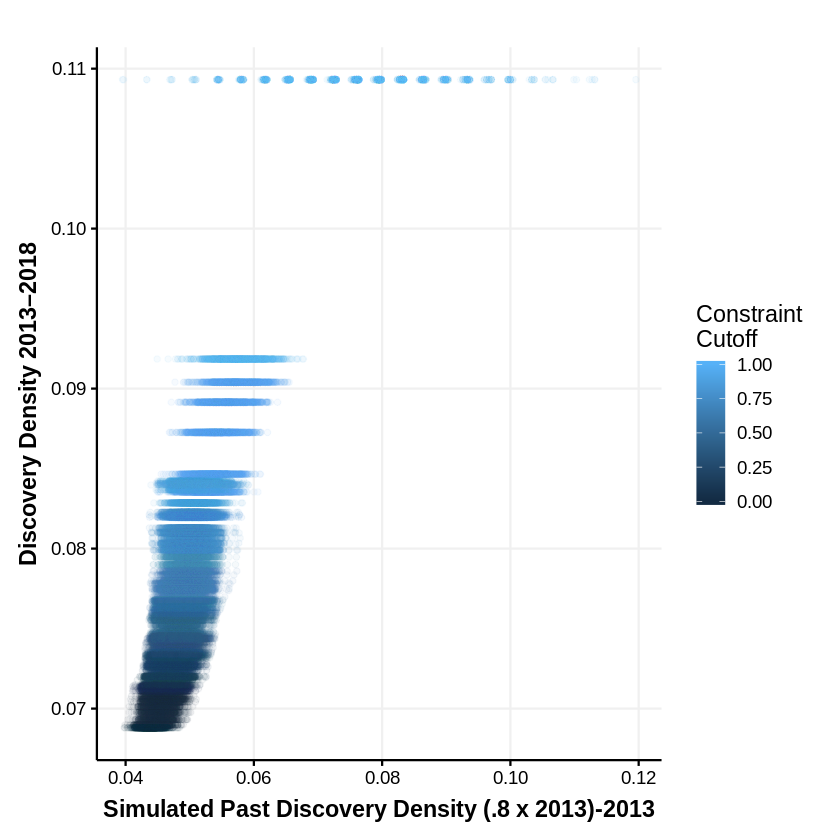

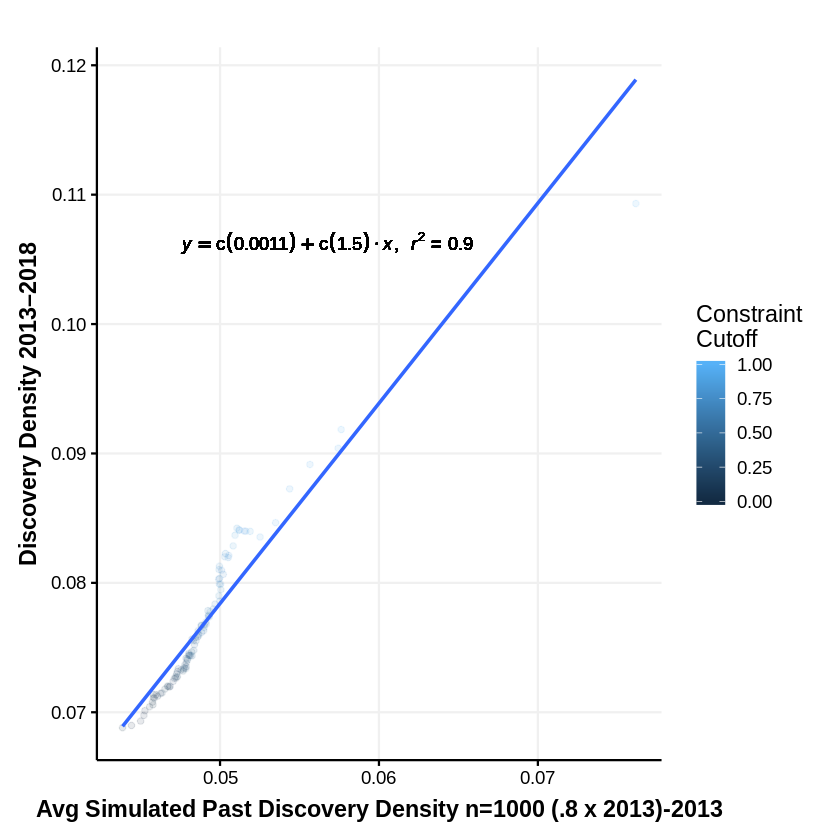

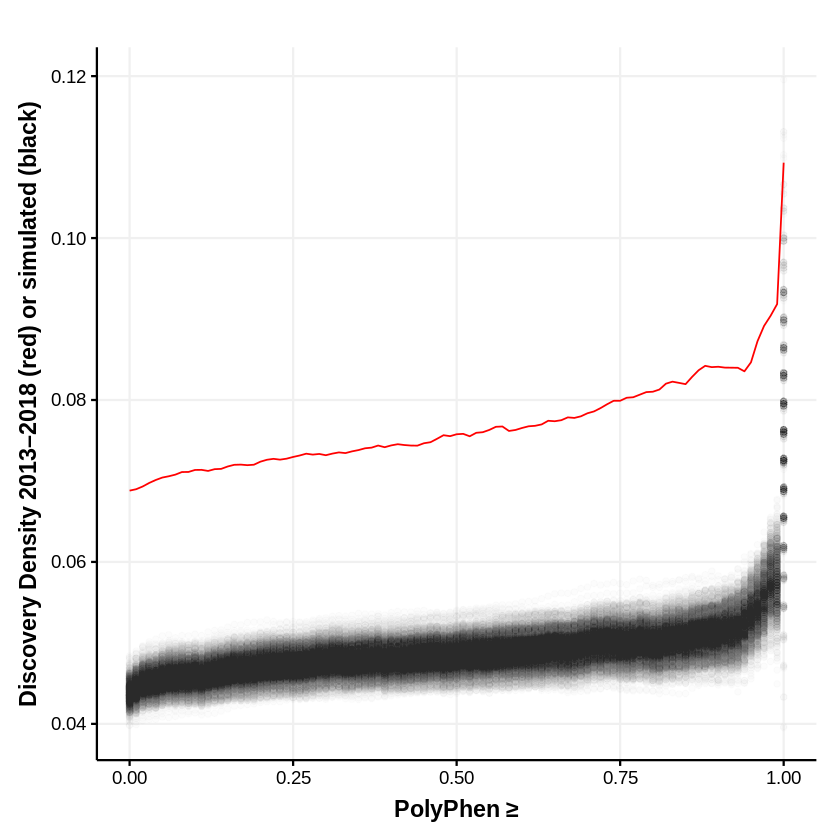

In [23]:
plot_simulated_discovery(polyphen_grouped, N_SIMS, score_plot_title="PolyPhen ≥")

## Sift

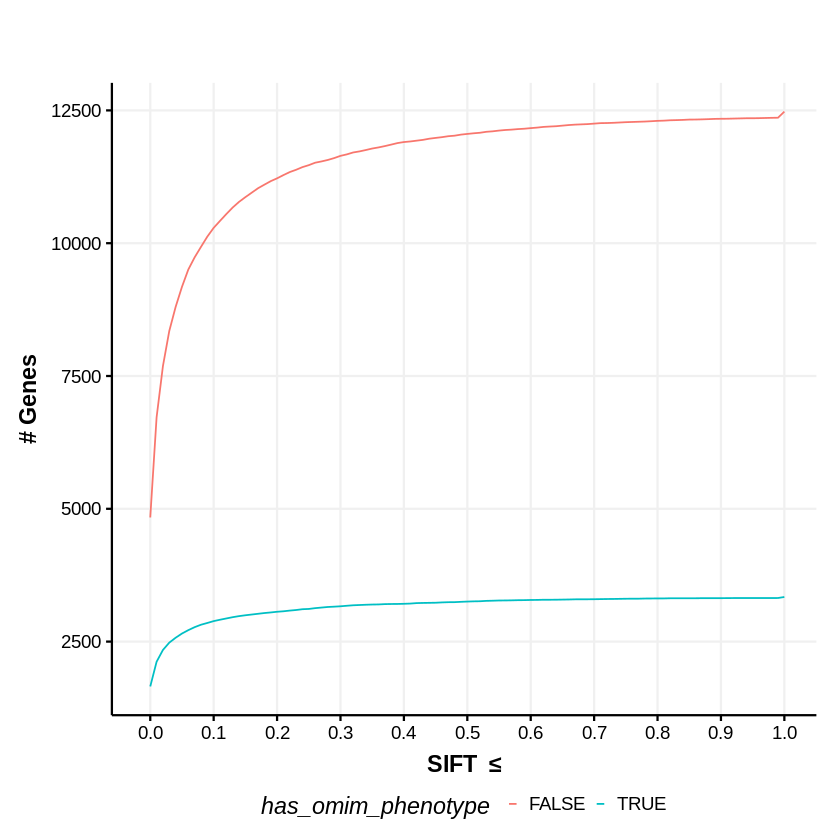

In [24]:
ggplot(sift_grouped, aes(greater_or_equal, n_2018, fill = has_omim_phenotype)) +
            #geom_bar(stat="identity", position = "dodge") +
            geom_line(aes(color = has_omim_phenotype)) +
            #scale_fill_brewer(palette = "Reds", direction = -1) +
            scale_fill_brewer(palette = "Paired") +
            ylab("# Genes") +
            #scale_y_log10() +
            xlab(paste("SIFT", " ≤")) +
            scale_x_continuous(breaks=seq(0,1,0.1), limits=c(-0.01, 1)) +
            ggtitle("") +
            theme_Publication()

$density
[1] 0.08662394

$value
[1] 0

$candidate_list_size
[1] 4837

$index
[1] 1

[1] 0

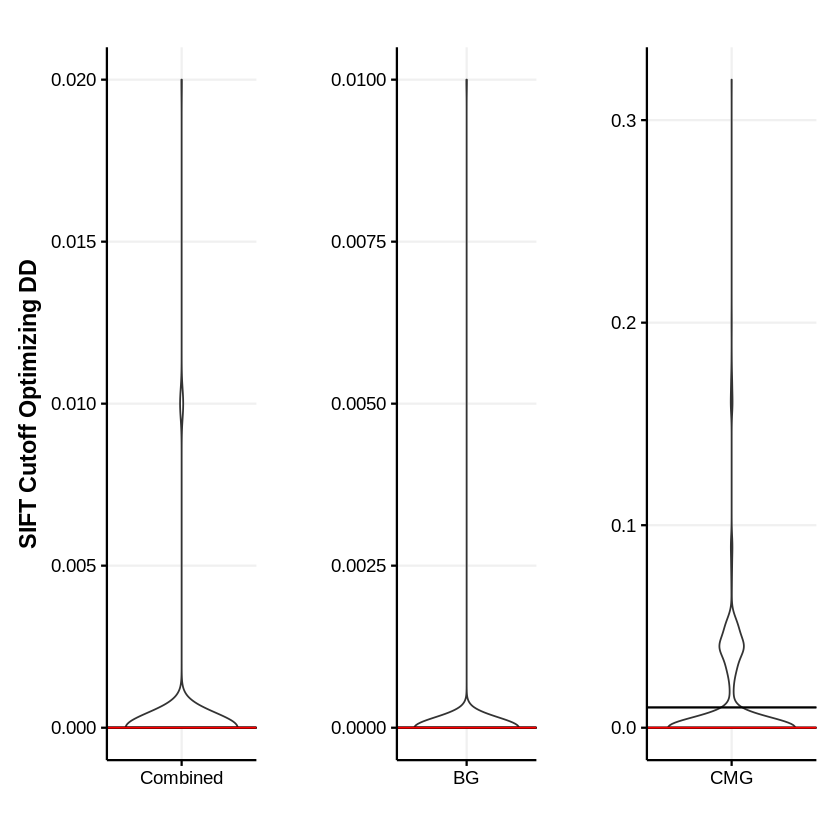

In [25]:
sift_cutoff = calculate_cutoff_filtered(sift_grouped)
sift_cutoff
multiplot(get_cutoff_violin_plot(sift_grouped, N_SIMS, xlabel="Combined", ylabel="SIFT Cutoff Optimizing DD"), get_cutoff_violin_plot(sift_grouped_bgl, N_SIMS, xlabel="BG"), get_cutoff_violin_plot(sift_grouped_cmg, N_SIMS, xlabel="CMG"), cols=3)
# Calculate cutoff distribution
sift_ecdf = ecdf(get_sim_cutoffs(sift_grouped, N_SIMS))
sift_ecdf(sift_cutoff$value - 0.001)

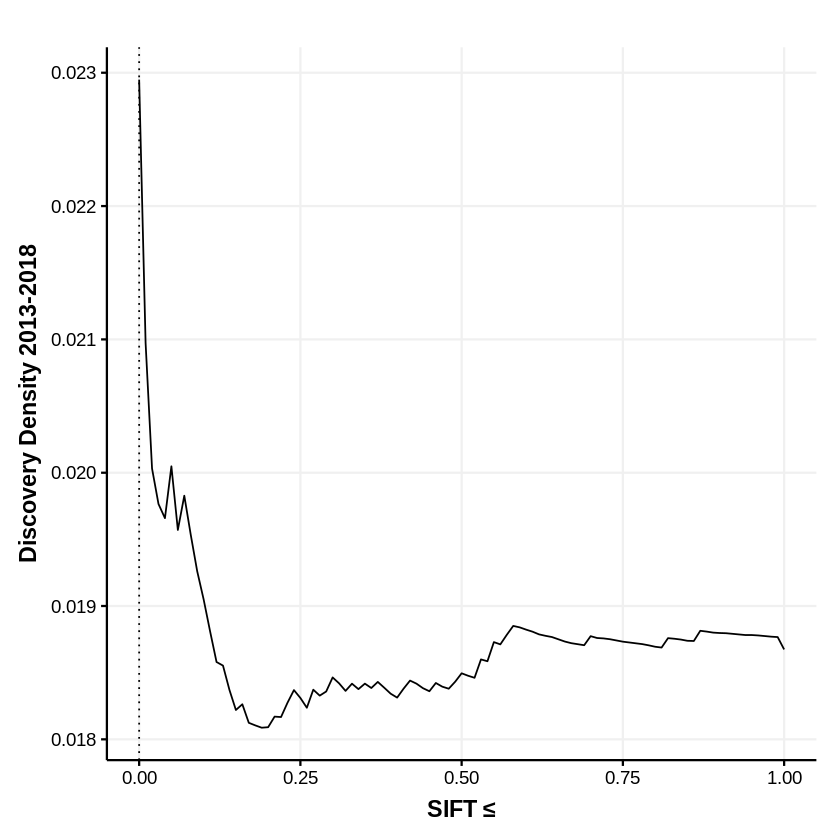

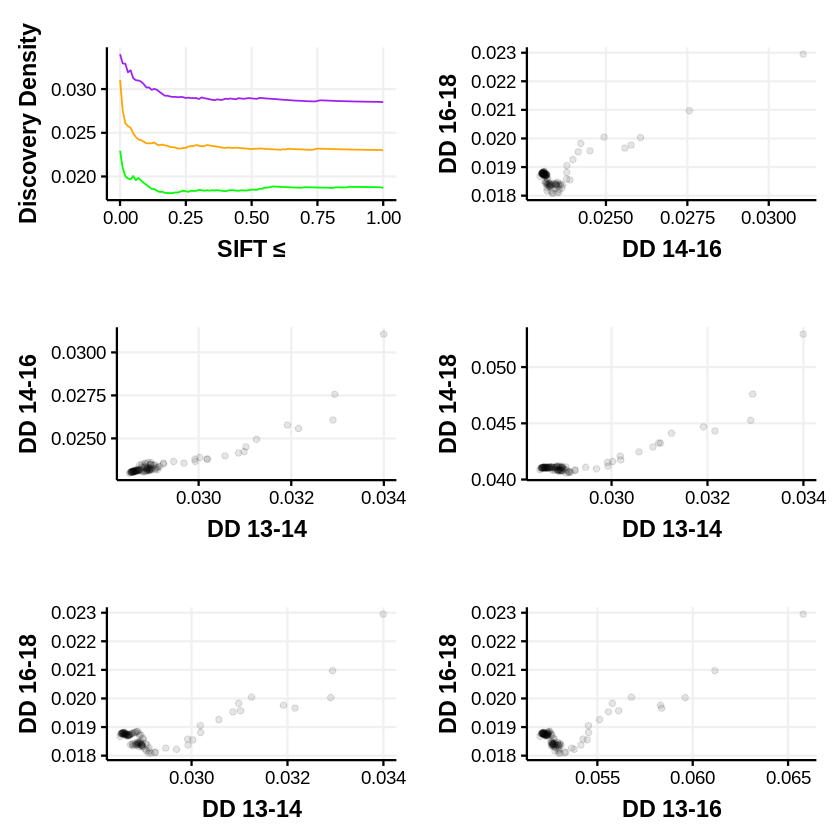

In [26]:
ggplot(sift_grouped, aes(x=greater_or_equal, y=discovery_density_2016to2018)) + geom_line() + ylab("Discovery Density 2013-2018") + xlab("SIFT ≤") + geom_vline(xintercept=sift_cutoff$value, linetype='dotted') + theme_Publication()

plot_dd_year_combinations(sift_grouped, "SIFT ≤")

Joining, by = "greater_or_equal"
Joining, by = "greater_or_equal"


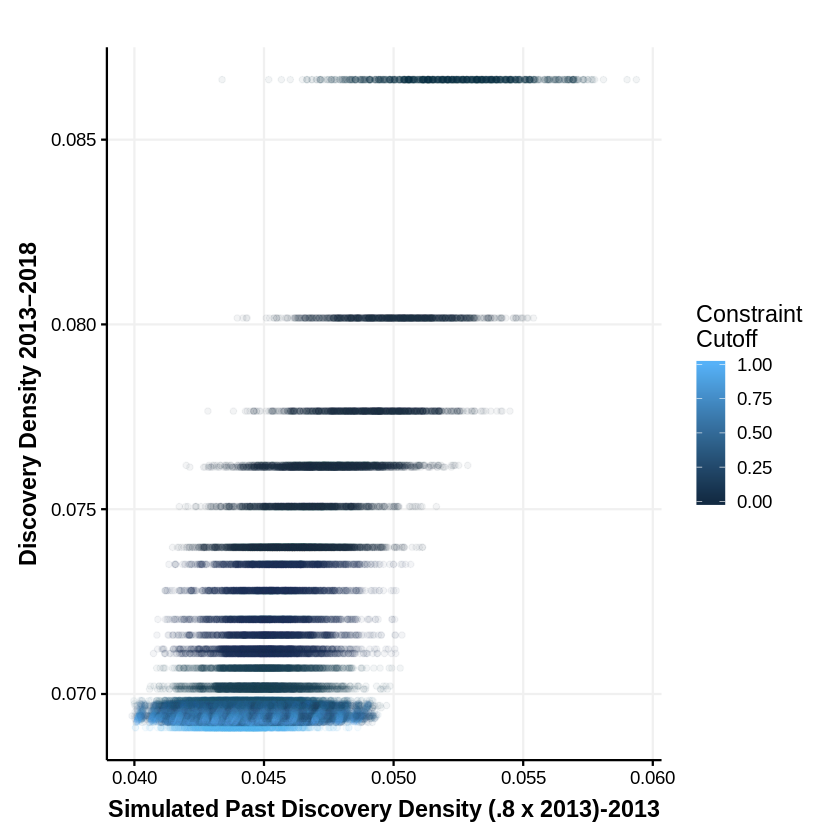

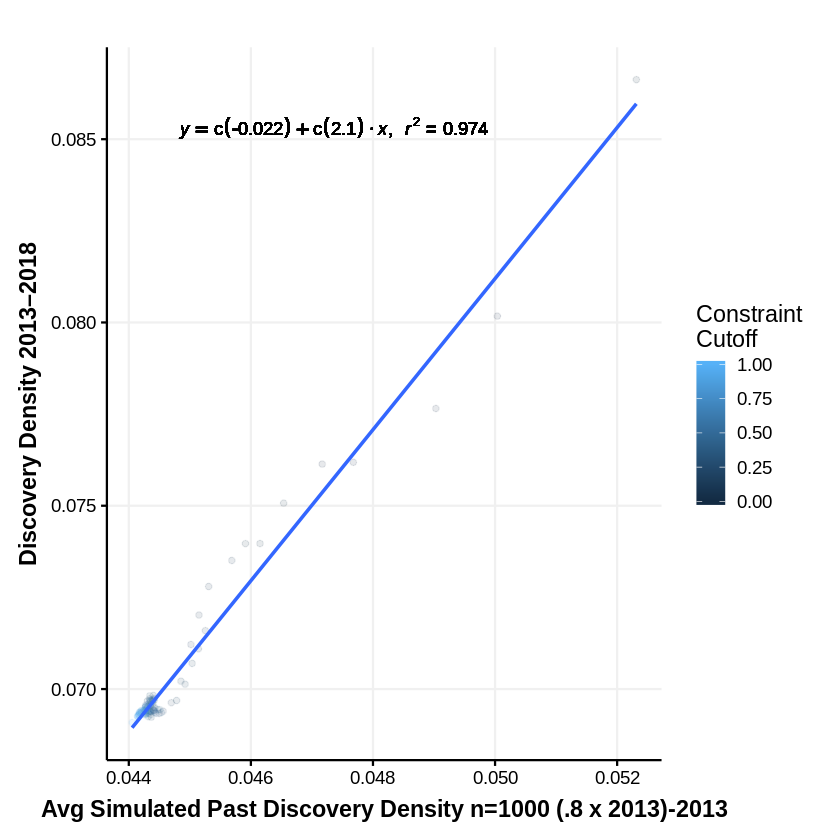

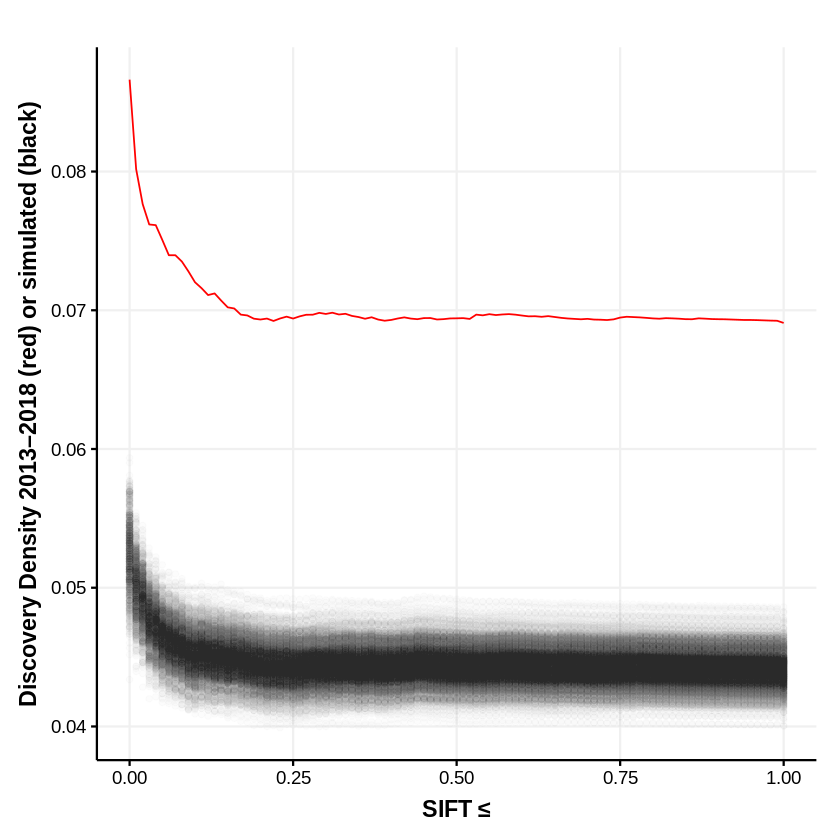

In [27]:
plot_simulated_discovery(sift_grouped, N_SIMS, score_plot_title="SIFT ≤")

___________________
# Identify candidate disease genes
___________________

In [28]:
lof_z_cutoff_candidates = filter(lof_z_filter, is.na(omim_gene_2018), greater_or_equal==lof_z_cutoff$value)[,"gene_symbol"]
mis_z_cutoff_candidates = filter(mis_z_filter, is.na(omim_gene_2018), greater_or_equal==mis_z_cutoff$value)[,"gene_symbol"]
mtr_cutoff_candidates = filter(mtr_filter, is.na(omim_gene_2018), greater_or_equal==mtr_cutoff$value)[,"gene_symbol"]
polyphen_cutoff_candidates = filter(polyphen_filter, is.na(omim_gene_2018), greater_or_equal==polyphen_cutoff$value)[,"gene_symbol"]
revel_cutoff_candidates = filter(revel_filter, is.na(omim_gene_2018), greater_or_equal==revel_cutoff$value)[,"gene_symbol"]
sift_cutoff_candidates = filter(sift_filter, is.na(omim_gene_2018), greater_or_equal==sift_cutoff$value)[,"gene_symbol"]

In [29]:
sort(as.factor(Reduce(union, list(lof_z_cutoff_candidates))))


[1] BIRC6    CSMD3    FRY      HECTD1   HECTD4   KIAA1109 LRP1B    MACF1   
 [9] MDN1     MYCBP2   NBEA     RYR3     SMG1     SPEN     TLN1     TRRAP   
[17] UBR4     UBR5     USP34    VPS13D  
20 Levels: BIRC6 CSMD3 FRY HECTD1 HECTD4 KIAA1109 LRP1B MACF1 MDN1 ... VPS13D

In [30]:
sort(as.factor(Reduce(union, list(mis_z_cutoff_candidates))))

[1] AGO1    AGO2    ATP1A1  CACNA1E CACNA1I CHD3    CLTC    CNOT1   HCN2   
[10] HECTD4  KPNB1   MAST1   POLR2A  POLR2B  PPFIA3  RBM15B  TNPO2   TRRAP  
[19] UBR5    UPF1   
20 Levels: AGO1 AGO2 ATP1A1 CACNA1E CACNA1I CHD3 CLTC CNOT1 HCN2 ... UPF1

In [31]:
sort(as.factor(Reduce(union, list(revel_cutoff_candidates))))

[1] ABCB9         ABCC10        ACACB         ACAD11        ACADL        
 [6] AMY2B         ARSJ          ATP11A        ATP12A        ATP1A4       
[11] ATP2B4        ATP9B         CACNA1I       CAPN8         CNGA2        
[16] COL16A1       COL24A1       CTD-3074O7.11 CYB5R2        DISP1        
[21] DNAH10        DTX3L         EHD3          FBN3          FIBCD1       
[26] HKDC1         HLTF          ITGB8         KCNH6         KDM5B        
[31] KLHL12        LRP1B         LTBP1         MAN2C1        MICALL1      
[36] MYH10         MYO1A         MYO1H         MYO5C         MYO7B        
[41] MYO9A         NIT2          NRP1          PDE1C         PKHD1L1      
[46] PKM           PLA2G15       PNPLA7        PRSS8         ROS1         
[51] RYR3          SCN3A         SLC12A2       SLC12A7       SMO          
[56] SULF2         SVEP1         TPCN1         TPH1          VWCE         
60 Levels: ABCB9 ABCC10 ACACB ACAD11 ACADL AMY2B ARSJ ATP11A ATP12A ... VWCE

In [32]:
sort(as.factor(Reduce(union, list(mtr_cutoff_candidates))))

[1] AATK    AP2A1   ATP6V0C CACNA1I CD6     CHD3    CMIP    CNOT3   CUL1   
[10] DDX46   DOT1L   EIF4A1  FBXO11  FNBP1L  GRIK5   HCN2    IRF2BPL LINGO1 
[19] MAP3K12 MEIS1   MTA1    NBEA    PCBP1   PCNXL3  POLR2A  PPP1R9B PRR12  
[28] PURB    RPS6KA4 SET     SETD1B  SF1     SPRN    SSBP3   TBX2    TLE3   
[37] TMEM259 TRRAP   UBC     UBR4    UNC13A  WNK2    XPO7   
43 Levels: AATK AP2A1 ATP6V0C CACNA1I CD6 CHD3 CMIP CNOT3 CUL1 DDX46 ... XPO7

## Candidate sets generated by SIFT and PolyPhen are far too large in size, so exclude them from defining final candidates. Thus, final missense candidates are intersection of lof_z, mis_z, mtr, and REVEL

In [33]:
final_candidates = sort(as.factor(Reduce(union, list(lof_z_cutoff_candidates, mis_z_cutoff_candidates, mtr_cutoff_candidates, revel_cutoff_candidates))))
final_candidates

[1] AATK          ABCB9         ABCC10        ACACB         ACAD11       
  [6] ACADL         AGO1          AGO2          AMY2B         AP2A1        
 [11] ARSJ          ATP11A        ATP12A        ATP1A1        ATP1A4       
 [16] ATP2B4        ATP6V0C       ATP9B         BIRC6         CACNA1E      
 [21] CACNA1I       CAPN8         CD6           CHD3          CLTC         
 [26] CMIP          CNGA2         CNOT1         CNOT3         COL16A1      
 [31] COL24A1       CSMD3         CTD-3074O7.11 CUL1          CYB5R2       
 [36] DDX46         DISP1         DNAH10        DOT1L         DTX3L        
 [41] EHD3          EIF4A1        FBN3          FBXO11        FIBCD1       
 [46] FNBP1L        FRY           GRIK5         HCN2          HECTD1       
 [51] HECTD4        HKDC1         HLTF          IRF2BPL       ITGB8        
 [56] KCNH6         KDM5B         KIAA1109      KLHL12        KPNB1        
 [61] LINGO1        LRP1B         LTBP1         MACF1         MAN2C1       
 [66] MAP3K12       MAST1         MDN1          MEIS1         MICALL1      
 [71] MTA1          MYCBP2        MYH10         MYO1A         MYO1H        
 [76] MYO5C         MYO7B         MYO9A         NBEA          NIT2         
 [81] NRP1          PCBP1         PCNXL3        PDE1C         PKHD1L1      
 [86] PKM           PLA2G15       PNPLA7        POLR2A        POLR2B       
 [91] PPFIA3        PPP1R9B       PRR12         PRSS8         PURB         
 [96] RBM15B        ROS1          RPS6KA4       RYR3          SCN3A        
[101] SET           SETD1B        SF1           SLC12A2       SLC12A7      
[106] SMG1          SMO           SPEN          SPRN          SSBP3        
[111] SULF2         SVEP1         TBX2          TLE3          TLN1         
[116] TMEM259       TNPO2         TPCN1         TPH1          TRRAP        
[121] UBC           UBR4          UBR5          UNC13A        UPF1         
[126] USP34         VPS13D        VWCE          WNK2          XPO7         
130 Levels: AATK ABCB9 ABCC10 ACACB ACAD11 ACADL AGO1 AGO2 AMY2B AP2A1 ... XPO7

### High-priority candidates

#### Intersection of LOF_Z and MIS_Z

In [34]:
Reduce(intersect, list(lof_z_cutoff_candidates,mis_z_cutoff_candidates))

[1] "TRRAP"  "HECTD4" "UBR5"

#### Intersection of LOF_Z and MTR

In [35]:
Reduce(intersect, list(mtr_cutoff_candidates,lof_z_cutoff_candidates))

[1] "TRRAP" "NBEA"  "UBR4"

#### Intersection of LOF_Z and REVEL

In [36]:
Reduce(intersect, list(revel_cutoff_candidates,lof_z_cutoff_candidates))

[1] "RYR3"  "LRP1B"

#### Intersection of MIS_Z and MTR

In [37]:
Reduce(intersect, list(mtr_cutoff_candidates, mis_z_cutoff_candidates))

[1] "TRRAP"   "CHD3"    "POLR2A"  "CACNA1I" "HCN2"

#### Intersection of MIS_Z, MTR, and REVEL

In [38]:
Reduce(intersect, list(revel_cutoff_candidates, mtr_cutoff_candidates, mis_z_cutoff_candidates))

[1] "CACNA1I"

#### Intersection of LOF_Z, MIS_Z, and MTR

In [39]:
Reduce(intersect, list(lof_z_cutoff_candidates, mtr_cutoff_candidates, mis_z_cutoff_candidates))

[1] "TRRAP"

### Union of all high-priority candidates

In [40]:
Reduce(union, list(Reduce(intersect, list(lof_z_cutoff_candidates,mis_z_cutoff_candidates)), Reduce(intersect, list(mtr_cutoff_candidates,lof_z_cutoff_candidates)), Reduce(intersect, list(mtr_cutoff_candidates, mis_z_cutoff_candidates)), Reduce(intersect, list(revel_cutoff_candidates,lof_z_cutoff_candidates)), Reduce(intersect, list(mtr_cutoff_candidates, mis_z_cutoff_candidates)), Reduce(intersect, list(revel_cutoff_candidates, mtr_cutoff_candidates, mis_z_cutoff_candidates)), Reduce(intersect, list(lof_z_cutoff_candidates, mtr_cutoff_candidates, mis_z_cutoff_candidates))))

[1] "TRRAP"   "HECTD4"  "UBR5"    "NBEA"    "UBR4"    "CHD3"    "POLR2A" 
 [8] "CACNA1I" "HCN2"    "RYR3"    "LRP1B"

## Visualize Intersections of missense candidate gene lists

In [41]:
# require("VennDiagram")
# NOTE VennDiagram only can do intersections of up to 5 sets

In [42]:
#VENN.LIST <- list(MTR = as.vector(mtr_cutoff_candidates), lof_z = as.vector(lof_z_cutoff_candidates), mis_z = as.vector(mis_z_cutoff_candidates), revel = as.vector(revel_cutoff_candidates))
#draw.venn.plot <- venn.diagram(VENN.LIST, filename="missense_mtr_lofz_misz_revel_intersect.tiff", fill=c("darkmagenta", "darkblue", "darkred", "darkgreen"), alpha=c(0.05,0.05,0.05,0.05), cex=2, cat.cex=1.1, cat.fontface=2, fontface=2, ext.text=FALSE, category.names=c("MTR", "LoF Z-score", "Missense Z-score", "REVEL"))
#draw.venn.plot <- venn.diagram(VENN.LIST, filename="missense_mtr_lofz_misz_revel_intersect_nocolor.tiff", category.names=c("MTR", "LoF Z-score", "Missense Z-score", "REVEL"), cex=1.1)

In [43]:
sort(as.factor(Reduce(union, list(mtr_cutoff_candidates,lof_z_cutoff_candidates,mis_z_cutoff_candidates, revel_cutoff_candidates))))

[1] AATK          ABCB9         ABCC10        ACACB         ACAD11       
  [6] ACADL         AGO1          AGO2          AMY2B         AP2A1        
 [11] ARSJ          ATP11A        ATP12A        ATP1A1        ATP1A4       
 [16] ATP2B4        ATP6V0C       ATP9B         BIRC6         CACNA1E      
 [21] CACNA1I       CAPN8         CD6           CHD3          CLTC         
 [26] CMIP          CNGA2         CNOT1         CNOT3         COL16A1      
 [31] COL24A1       CSMD3         CTD-3074O7.11 CUL1          CYB5R2       
 [36] DDX46         DISP1         DNAH10        DOT1L         DTX3L        
 [41] EHD3          EIF4A1        FBN3          FBXO11        FIBCD1       
 [46] FNBP1L        FRY           GRIK5         HCN2          HECTD1       
 [51] HECTD4        HKDC1         HLTF          IRF2BPL       ITGB8        
 [56] KCNH6         KDM5B         KIAA1109      KLHL12        KPNB1        
 [61] LINGO1        LRP1B         LTBP1         MACF1         MAN2C1       
 [66] MAP3K12       MAST1         MDN1          MEIS1         MICALL1      
 [71] MTA1          MYCBP2        MYH10         MYO1A         MYO1H        
 [76] MYO5C         MYO7B         MYO9A         NBEA          NIT2         
 [81] NRP1          PCBP1         PCNXL3        PDE1C         PKHD1L1      
 [86] PKM           PLA2G15       PNPLA7        POLR2A        POLR2B       
 [91] PPFIA3        PPP1R9B       PRR12         PRSS8         PURB         
 [96] RBM15B        ROS1          RPS6KA4       RYR3          SCN3A        
[101] SET           SETD1B        SF1           SLC12A2       SLC12A7      
[106] SMG1          SMO           SPEN          SPRN          SSBP3        
[111] SULF2         SVEP1         TBX2          TLE3          TLN1         
[116] TMEM259       TNPO2         TPCN1         TPH1          TRRAP        
[121] UBC           UBR4          UBR5          UNC13A        UPF1         
[126] USP34         VPS13D        VWCE          WNK2          XPO7         
130 Levels: AATK ABCB9 ABCC10 ACACB ACAD11 ACADL AGO1 AGO2 AMY2B AP2A1 ... XPO7